# COSC 2793 - Assignment 2

**Student name & ID**: Sowmiya Kumar(s4040536)

**Student name & ID**: Mohammad Reyaz Mohammad Rafi(s4067516)

# DATA LOADING AND EXPLORATION

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

In [2]:
# Loading main_data
main_data = pd.read_csv('Image_classification_data/data_labels_mainData.csv')
print("Main Data shape:", main_data.shape)
main_data

Main Data shape: (9896, 6)


,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [3]:
# Loading extra_data
extra_data = pd.read_csv('Image_classification_data/data_labels_extraData.csv')
print("Extra Data shape:", extra_data.shape)
extra_data

Extra Data shape: (10384, 4)


,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [4]:
# Data structure & info
print("MAIN DATA STRUCTURE & INFO")
main_data.info()

MAIN DATA STRUCTURE & INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [5]:
print("EXTRA DATA STRUCTURE & INFO")
extra_data.info()

EXTRA DATA STRUCTURE & INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [6]:
print("MAIN DATA STATISTICAL INFO")
main_data.describe()

MAIN DATA STATISTICAL INFO


,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [7]:
print("EXTRA DATA STATISTICAL INFO")
extra_data.describe()

EXTRA DATA STATISTICAL INFO


,InstanceID,patientID,isCancerous
count,10384.000000,10384.00000,10384.000000
mean,12087.866333,80.38203,0.287943
std,6173.866838,9.40388,0.452826
min,1631.000000,61.00000,0.000000
25%,6655.750000,71.00000,0.000000
50%,12377.500000,81.00000,0.000000
75%,16374.250000,88.00000,1.000000
max,22235.000000,99.00000,1.000000


In [8]:
# Understanding data
def stat(data_frame, has_cell_type=False):
# Check for missing values
    print("\n Missing Values:")
    print(data_frame.isnull().sum())
    
    # Number of unique patients
    num_patients = data_frame['patientID'].nunique()
    print(f"\n Number of unique patients: {num_patients}")
    
    # Unique cell types
    if has_cell_type ==True:
        unique_cell_types = data_frame['cellType'].unique()
        print(f"\n Unique cell types: {unique_cell_types}")
        print(f" Number of cell types: {len(unique_cell_types)}")
print("MAIN DATA")
stat(main_data, True)
print("----------------------------------------------\nEXTRA DATA")
stat(extra_data, False)

MAIN DATA

 Missing Values:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

 Number of unique patients: 60

 Unique cell types: [0 1 3 2]
 Number of cell types: 4
----------------------------------------------
EXTRA DATA

 Missing Values:
InstanceID     0
patientID      0
ImageName      0
isCancerous    0
dtype: int64

 Number of unique patients: 38


## Data Distribution

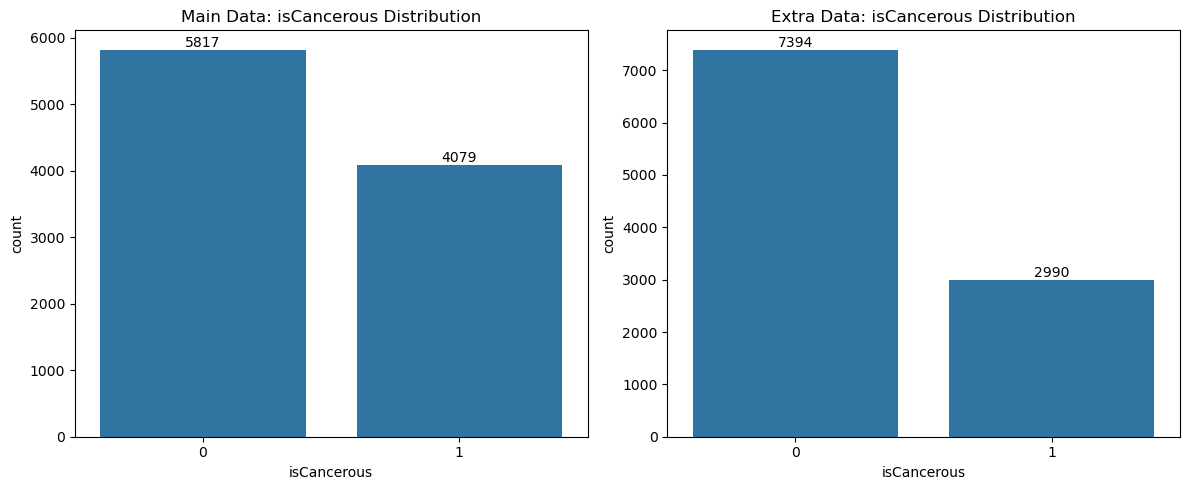

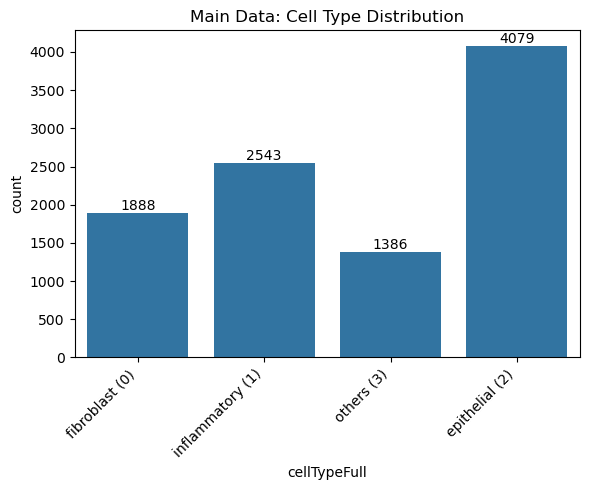

In [9]:
# Data Distribution Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Main data cancerous
sns_plot_0 = sns.countplot(ax=axes[0], x='isCancerous', data=main_data)
axes[0].set_title('Main Data: isCancerous Distribution')
for p in sns_plot_0.patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Extra data cancerous
sns_plot_1 = sns.countplot(ax=axes[1], x='isCancerous', data=extra_data)
axes[1].set_title('Extra Data: isCancerous Distribution')
for p in sns_plot_1.patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Create combined label: e.g., "Epithelial (0)"
main_data['cellTypeFull'] = main_data['cellTypeName'] + ' (' + main_data['cellType'].astype(str) + ')'

plt.figure(figsize=(6,5))
sns_plot = sns.countplot(x='cellTypeFull', data=main_data)
plt.title('Main Data: Cell Type Distribution')
plt.xticks(rotation=45, ha='right')

# Add count annotations
for p in sns_plot.patches:
    sns_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Figure 1**: Data Distribution Plot for *main_data* & *extra_data*.

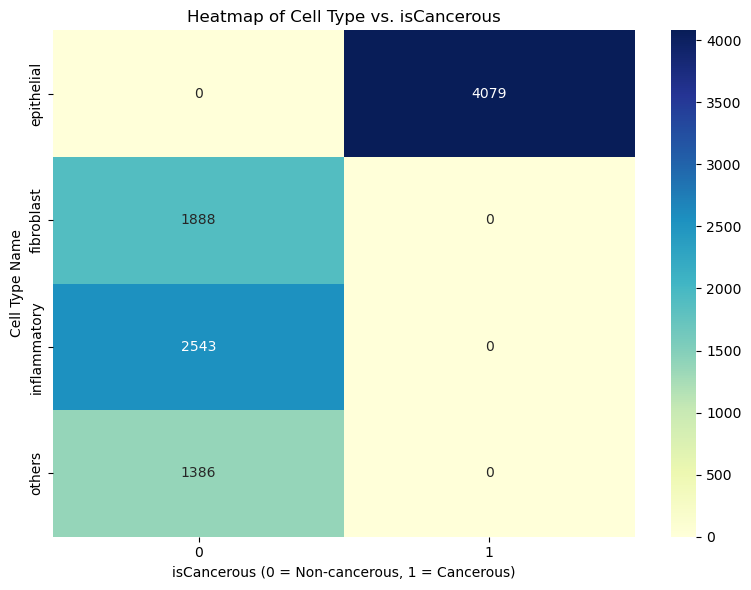

In [10]:
# Relationship between cell type and cancer

# Create a cross-tabulation of cellTypeName vs. isCancerous
ct = pd.crosstab(main_data['cellTypeName'], main_data['isCancerous'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Cell Type vs. isCancerous')
plt.xlabel('isCancerous (0 = Non-cancerous, 1 = Cancerous)')
plt.ylabel('Cell Type Name')
plt.tight_layout()
plt.show()

**Figure 2**: Heatmap for relationship between *iscancer* & *cellType*.

###  Data Loading & Exploratory Data Analysis (EDA)

#### Main Dataset Overview
- **Shape:** 9896 rows × 6 columns  
- **Missing Values:** None  
- **Patients:** 60 unique patient IDs  
- **Target Columns:** `isCancerous` (binary), `cellTypeName` (categorical with 4 classes)

#### Target Distributions(Fig 1)
- **Cancerous (`isCancerous`):**  
  - Non-cancerous (0): 5817 cells (~59%)  
  - Cancerous (1): 4079 cells (~41%)  
  - *Slight imbalance; still representative for binary classification.*

- **Cell Type (`cellTypeName`):**  
  - Epithelial: 4079 (~41%)  
  - Inflammatory: 2543 (~26%)  
  - Fibroblast: 1888 (~19%)  
  - Others: 1386 (~14%)  
  - *Noticeable class imbalance; epithelial cells are dominant.*

#### Relationship: Cell Type vs. Cancer Status (Fig 2)
- **Perfect Correlation:** All `isCancerous=1` (cancerous) cells are of **epithelial** type. No other cell types are marked cancerous.
- **Implication:**  
  - Strong correlation may lead to **data leakage** in cell type models if `isCancerous` is not excluded.
  - Cell type and cancer prediction tasks should be treated as **independent supervised learning problems**, each excluding the other label during training.

---

#### Extra Dataset Overview
- **Shape:** 10384 rows × 4 columns  
- **Patients:** 39 patients (with `isCancerous` labels only)  
- **Target Distribution:**(Fig 1)
  - Non-cancerous (0): 7394 (~72%)  
  - Cancerous (1): 2990 (~28%)  
  - *Greater imbalance compared to main data, skewed toward non-cancerous.*

## Exploring Patch Images

In [11]:
# Libraries
import tensorflow as tf
import os
import itertools
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# image dir
IMG_DIR = 'Image_classification_data/patch_images'

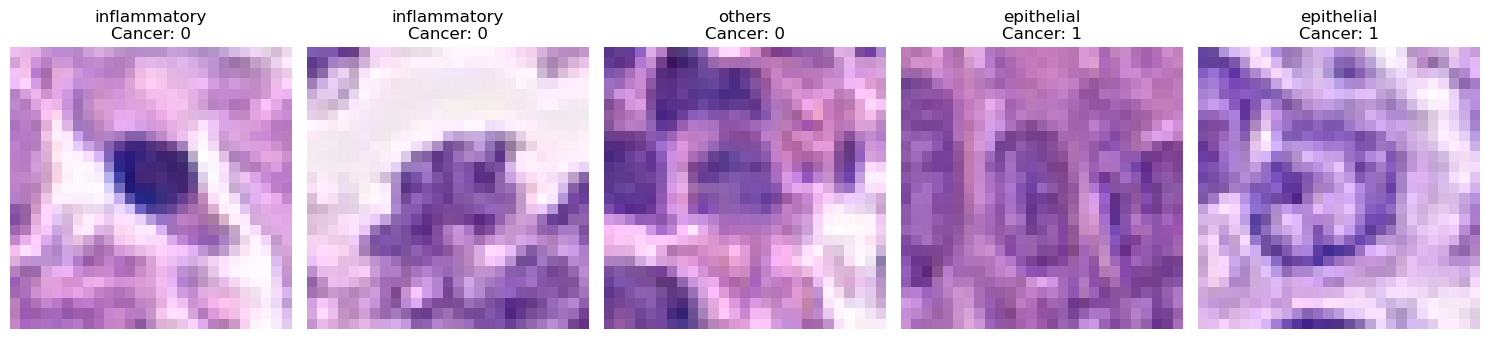

In [12]:
# Show 5 random images from main_data
sample_images = main_data.sample(5, random_state=42)

plt.figure(figsize=(15, 5))
for i, (idx, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(IMG_DIR, row['ImageName'])
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{row['cellTypeName']}\nCancer: {row['isCancerous']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Figure 3**: Ramdom sample images from *main_data*

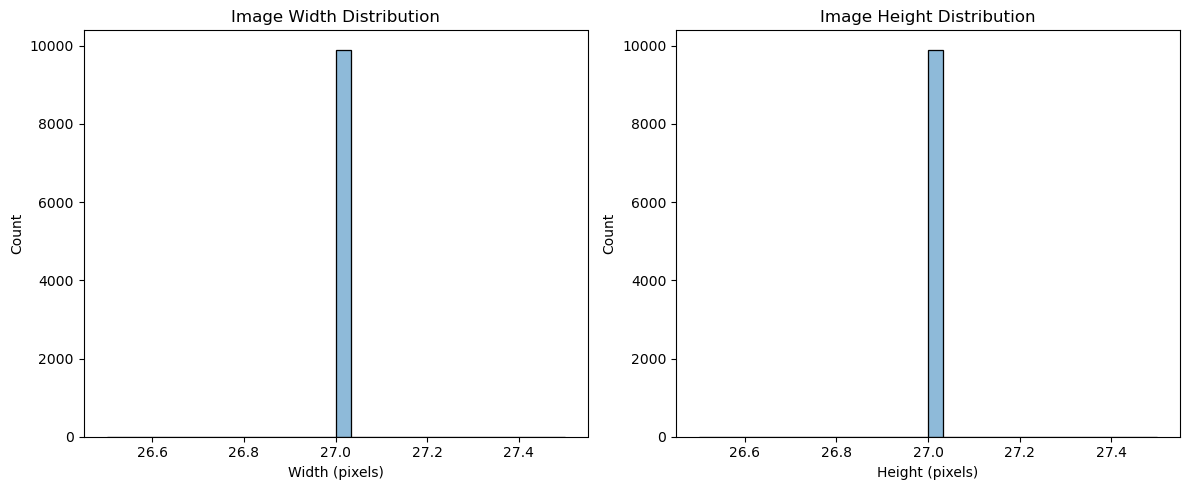

In [13]:
# Image distribution

# Store image sizes
widths = []
heights = []

# Loop through image names in main_data
for img_name in main_data['ImageName']:
    img_path = os.path.join(IMG_DIR, img_name)
    try:
        with Image.open(img_path) as img:
            widths.append(img.width)
            heights.append(img.height)
    except:
        print(f"Error loading image: {img_path}")

# Plot width and height distribution
plt.figure(figsize=(12, 5))

# Width distribution
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True)
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')

# Height distribution
plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True)
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')

plt.tight_layout()
plt.show()

* All the images are of dimension 27x27(Width x Height)

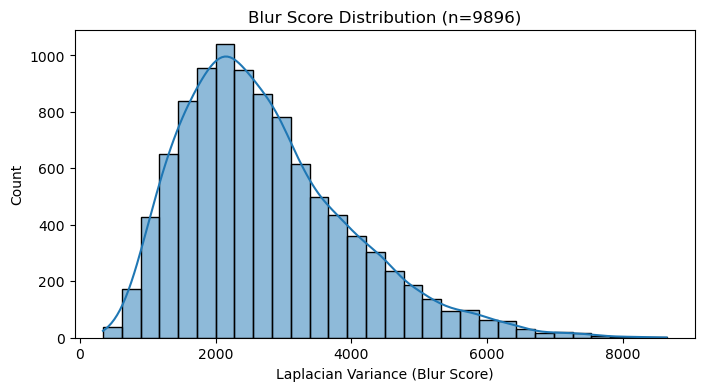

Detected 0 potentially blurry images (score < 200) out of 9896 total.


<Figure size 1200x400 with 0 Axes>

In [15]:
# Inspecting main_data images for bluriness using Laplacian method

# 1) Define a function using the Laplacian method to compute blur score
def variance_of_laplacian(image_path):
    """Compute the Laplacian variance of the grayscale image at image_path."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return cv2.Laplacian(img, cv2.CV_64F).var()

# 2) Compute blur scores for the entire dataset
blur_scores = []
image_names = main_data['ImageName'].tolist()

for name in image_names:
    path = os.path.join(IMG_DIR, name)
    blur_scores.append(variance_of_laplacian(path))

# 3) Plot the distribution of blur scores
plt.figure(figsize=(8,4))
sns.histplot(blur_scores, bins=30, kde=True)
plt.xlabel("Laplacian Variance (Blur Score)")
plt.title(f"Blur Score Distribution (n={len(blur_scores)})")
plt.show()

# 4) Choose a threshold for “blurry” images (common heuristic: variance < 100)
threshold = 200
blurry_names = [n for n, s in zip(image_names, blur_scores) if s < threshold]
print(f"Detected {len(blurry_names)} potentially blurry images (score < {threshold}) out of {len(image_names)} total.")

# 5) Display a few of the detected blurry images for visual confirmation
plt.figure(figsize=(12,4))
for i, name in enumerate(blurry_names[:8]):
    img = cv2.cvtColor(cv2.imread(os.path.join(IMG_DIR, name)), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(f"{name}\nScore={variance_of_laplacian(os.path.join(IMG_DIR,name)):.1f}")
    plt.axis('off')
plt.suptitle("Sample Blurry Images (Laplacian Variance < 100)")
plt.tight_layout()
plt.show()

#### Observations
* All 9,896 histology patches were scored using the Laplacian‐variance method; scores ranged from ~500 to 8,000.
* No image fell below a conservative blur threshold (200), indicating **zero out-of-focus** patches.

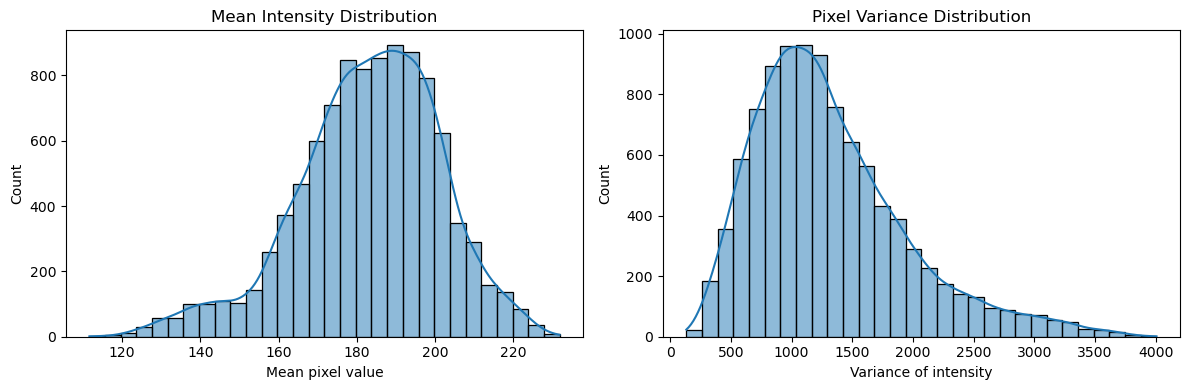

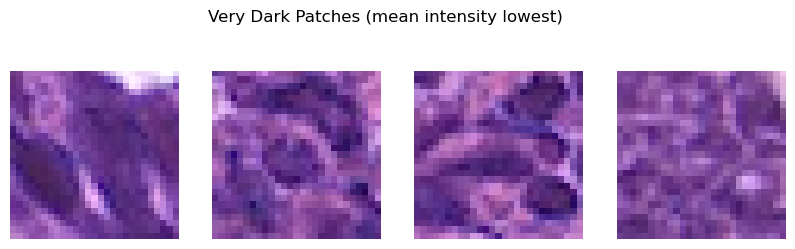

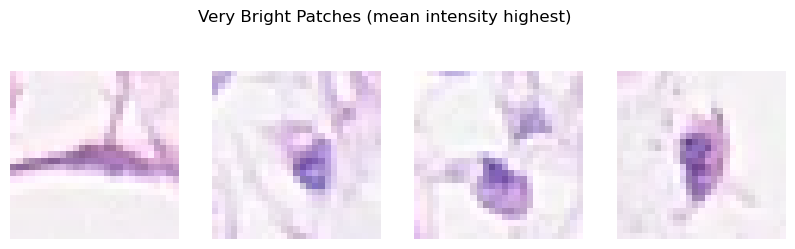

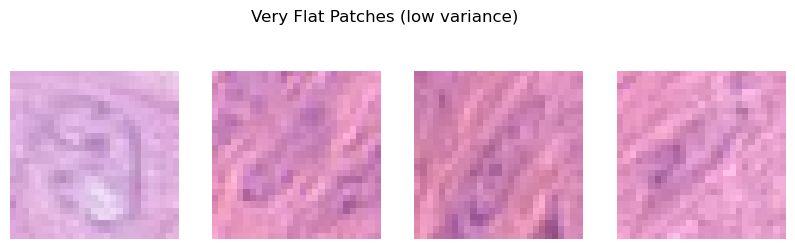

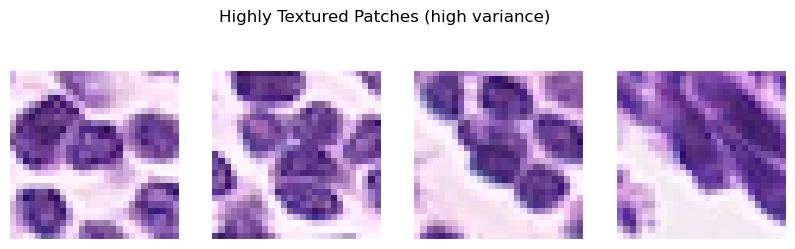

In [14]:
# Inspecting images for potential issues

# 1) Compute per‐image mean & variance to spot blank or extreme‐brightness patches
means, vars_ = [], []
for fn in main_data['ImageName']:
    im = np.array(Image.open(os.path.join(IMG_DIR, fn)))
    # flatten RGB → intensity
    gray = im.mean(axis=-1)
    means.append(gray.mean())
    vars_.append(gray.var())

# 2) Plot distribution of mean brightness and pixel variance
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(means, bins=30, ax=ax1, kde=True)
ax1.set(title='Mean Intensity Distribution', xlabel='Mean pixel value')
sns.histplot(vars_, bins=30, ax=ax2, kde=True)
ax2.set(title='Pixel Variance Distribution', xlabel='Variance of intensity')
plt.tight_layout()
plt.show()

# 3) Sample extremes for visual inspection
#   - Very dark (low mean), very bright (high mean)
#   - Very flat (low var), very textured (high var)
indices = np.arange(len(means))
low_mean = indices[np.argsort(means)[:4]]
high_mean = indices[np.argsort(means)[-4:]]
low_var  = indices[np.argsort(vars_)[:4]]
high_var = indices[np.argsort(vars_)[-4:]]

def show_samples(idxs, title):
    plt.figure(figsize=(10,3))
    for i, idx in enumerate(idxs):
        fn = main_data['ImageName'].iloc[idx]
        img = Image.open(os.path.join(IMG_DIR, fn))
        plt.subplot(1, len(idxs), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(low_mean,  "Very Dark Patches (mean intensity lowest)")
show_samples(high_mean, "Very Bright Patches (mean intensity highest)")
show_samples(low_var,   "Very Flat Patches (low variance)")
show_samples(high_var,  "Highly Textured Patches (high variance)")


> <span style="font-size:1em;"></span>**Observations from Patch Statistics**(above)
>- **Mean Intensity:** Most images fall within mid-tones (170–200), with a few very dark (<140) or very bright (>220) patches.
>- **Pixel Variance:** Most patches show moderate texture (800–1600), with few flat (<500) or overly textured (>2500) outliers.
>- **Visual Screening:**  
>      * No blank/saturated patches found.
>      * All patches, even outliers, retain visual features relevant for classification.

> <span style="font-size:1em;"></span>**Final thoughts**
>- **No data filtering required.** Extreme intensity or variance patches are still diagnostically useful.
>- **Class imbalance in both tasks should be addressed** via methods like:
>      * Class weighting or resampling for binary classification
>      * Macro-averaged metrics (F1, recall) for fair multi-class evaluation

# DATA PREPARATION

### Train/Val/Test split

- **Patient-wise 60/20/20 Split**: Data is split at the `patientID` level—ensuring that images from a single patient appear in only one of the train, validation, or test sets. This prevents **patient-specific data leakage**, where the model could overfit to patterns unique to individuals rather than generalizing across cases.

- **Stratified Sampling by Majority Label**: Each patient is labeled by their dominant `isCancerous` class, enabling approximate stratification across splits. This ensures consistent class balance for cancerous and non-cancerous samples in each subset.

- **Two-Stage Split**:
  - First, 60% of patients are allocated to training.
  - The remaining 40% are evenly divided into validation (20%) and test (20%) sets using the same stratification logic.
  - This method preserves class distribution while maintaining full isolation between splits.

- **Why Patient-Level Splitting Matters**: Without grouping by patient, random splitting could place cells from the same patient in both training and test sets. This causes **data leakage**, allowing the model to "memorize" individual traits rather than learning generalizable features—leading to inflated test performance and unreliable real-world results ([source](https://medium.com/codex/how-to-prevent-data-leakage-problem-illustrated-with-practical-examples-10604e83c4ab)).

- **Validation Strategy**: A dedicated validation set is held out during training and used only for hyperparameter tuning and early stopping—ensuring that the final test set reflects unbiased, unseen model performance.

- **Image Normalization**: After splitting, all images are rescaled to the [0, 1] range using `ImageDataGenerator`, standardizing pixel intensities and promoting stable model convergence.


In [15]:
# Combining both data for Cancer prediction and data splitting

# Keep only necessary columns for isCancerous
main_df_cancer = main_data[['InstanceID', 'patientID', 'ImageName', 'isCancerous']]

print(f"Cancer  main_dataset shape: {main_df_cancer.shape}")
print(main_df_cancer['isCancerous'].value_counts())


# 1) Compute majority label per patient
patient_majority = main_df_cancer.groupby('patientID')['isCancerous'] \
                              .agg(lambda x: x.mode()[0]) \
                              .reset_index()  # columns: patientID, isCancerous

# 2) Split patients stratified on that majority label
train_p, temp_p = train_test_split(
    patient_majority['patientID'],
    test_size=0.4,
    stratify=patient_majority['isCancerous'],
    random_state=42
)
val_p, test_p = train_test_split(
    temp_p,
    test_size=0.5,
    stratify=patient_majority.set_index('patientID').loc[temp_p,'isCancerous'],
    random_state=42
)

# 3) Build dataframes
train_df = main_df_cancer[main_df_cancer['patientID'].isin(train_p)]
val_df   = main_df_cancer[main_df_cancer['patientID'].isin(val_p)]
test_df  = main_df_cancer[main_df_cancer['patientID'].isin(test_p)]

print("\nPatient-based split complete. Sizes:")
print(" Train:", train_df.shape)
print(" Val:  ", val_df.shape)
print(" Test: ", test_df.shape)


Cancer  main_dataset shape: (9896, 4)
isCancerous
0    5817
1    4079
Name: count, dtype: int64

Patient-based split complete. Sizes:
 Train: (6231, 4)
 Val:   (1658, 4)
 Test:  (2007, 4)


In [16]:
# Check patient-level leakage
train_pats = set(train_df['patientID'])
val_pats   = set(val_df['patientID'])
test_pats  = set(test_df['patientID'])

leak_train_val = train_pats & val_pats
leak_train_test = train_pats & test_pats
leak_val_test   = val_pats   & test_pats

print("Patients in both Train & Val:", leak_train_val)
print("Patients in both Train & Test:", leak_train_test)
print("Patients in both Val   & Test:", leak_val_test)


Patients in both Train & Val: set()
Patients in both Train & Test: set()
Patients in both Val   & Test: set()


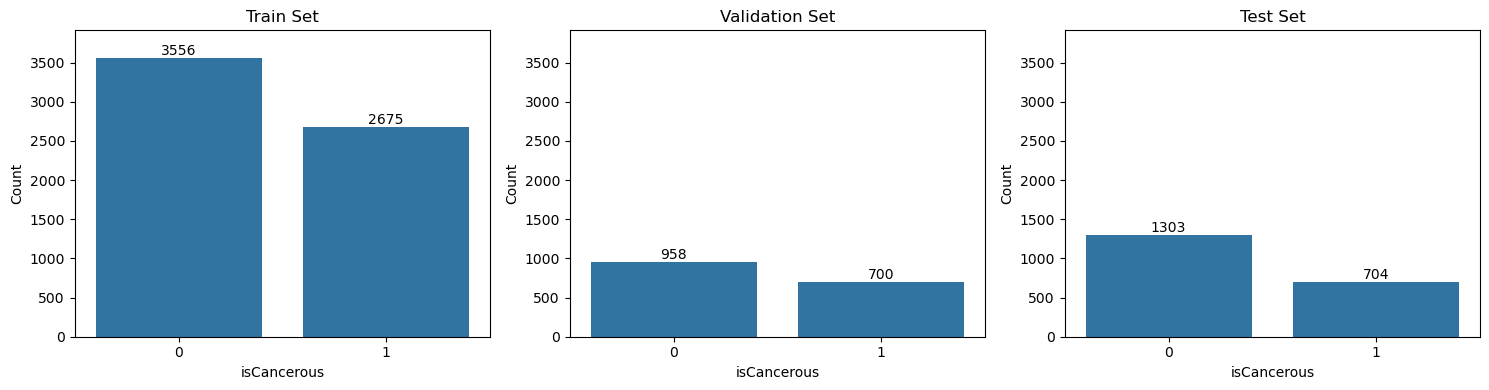

In [18]:
# Split distribution check

def plot_split_distribution(df_list, split_names, label_col):
    """
    Plots the count distribution for `label_col` across multiple DataFrames.
    
    Parameters:
    - df_list:     list of pandas.DataFrame (e.g. [train_df, val_df, test_df])
    - split_names: list of names to title each subplot (e.g. ['Train','Val','Test'])
    - label_col:   the column name to count/plot (e.g. 'isCancerous' or 'cellType')
    """
    n = len(df_list)
    plt.figure(figsize=(5*n, 4))
    
    max_count = max(df[label_col].value_counts().max() for df in df_list)
    
    for i, (df, name) in enumerate(zip(df_list, split_names), 1):
        ax = plt.subplot(1, n, i)
        sns.countplot(x=label_col, data=df, ax=ax)
        ax.set_title(f"{name} Set")
        ax.set_xlabel(label_col)
        ax.set_ylabel("Count")
        ax.set_ylim(0, max_count + max_count*0.1)  # add 10% headroom
        
        # Annotate bar values
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{int(height)}",
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


plot_split_distribution([train_df, val_df, test_df], ["Train", "Validation", "Test"],label_col='isCancerous')



Train/Val/Test splits maintain the almost same cancer/non-cancer ratio, so model evaluation remains fair. But still there exixts some imabalance and needs to be handled using class weight balancing or resampling.

## Normalization using ImageDataGenerator

In [19]:
# Setting randomseed for reproducibility

# 1) OS-level (for some hashing/determinism)
os.environ['PYTHONHASHSEED'] = '42'

# 2) Python built-ins
random.seed(42)

# 3) NumPy
np.random.seed(42)

# 4) TensorFlow
tf.random.set_seed(42)

import warnings

# 5) Mute *all* warnings
warnings.filterwarnings('ignore')

Found 6231 validated image filenames belonging to 2 classes.
Found 1658 validated image filenames belonging to 2 classes.


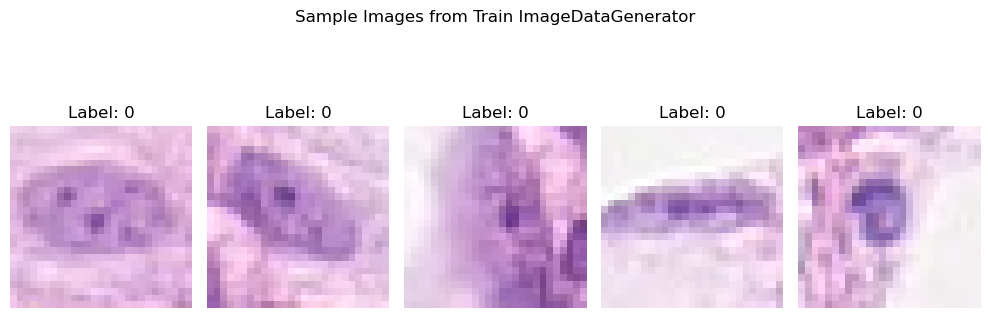

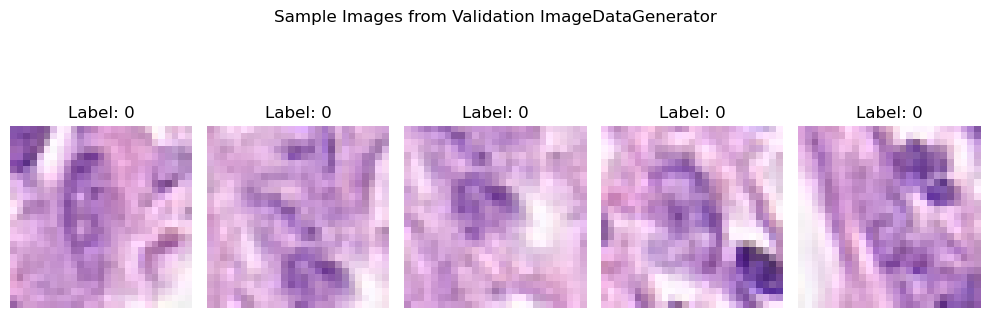

In [20]:
# Normalization

# Define generator with rescaling only (normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Converting labels to strings for binary classification
train_df['isCancerous'] = train_df['isCancerous'].astype(str)
val_df['isCancerous'] = val_df['isCancerous'].astype(str)
test_df['isCancerous'] = test_df['isCancerous'].astype(str)

# Flow from dataframe (using train_df)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=IMG_DIR,
    x_col="ImageName",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

# Flow from dataframe (using val_df)
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=IMG_DIR,
    x_col="ImageName",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

# Display 5 sample images with labels from train_generator
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_batch[i].squeeze())
    plt.title(f"Label: {int(y_batch[i])}")
    plt.axis('off')
plt.suptitle("Sample Images from Train ImageDataGenerator")
plt.tight_layout()
plt.show()

# Display 5 sample images with labels from validation_generator
x_batch, y_batch = next(validation_generator)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_batch[i].squeeze())
    plt.title(f"Label: {int(y_batch[i])}")
    plt.axis('off')
plt.suptitle("Sample Images from Validation ImageDataGenerator")
plt.tight_layout()
plt.show()

The Image RGB pixel values are normalised[0,1]

# DATA MODELLING - Cancer Prediction

## GOAL

Classify images according to whether given cell image represents a cancerous cells or not (isCancerous).

### Performance Metrics Selection

#### Loss Function
**Binary Cross-Entropy** is used for training, as it quantifies how close predicted probabilities are to the true binary labels. It is particularly suited for medical tasks like cancer classification, where overconfident misclassifications (especially false negatives) must be heavily penalized.

#### Evaluation Metrics
Given the moderate class imbalance (~60% non-cancerous vs. ~40% cancerous), metrics that account for label imbalance are prioritized:

- **Macro F1-Score**: Favored over accuracy because it equally weights both classes, ensuring that performance on minority (cancerous) samples is not overshadowed by the majority class.
- **Precision & Recall**: Provide class-specific insight—especially important to monitor cancerous recall (sensitivity) to minimize missed detections.
- **Accuracy & Loss**: Offer a general view of model performance, but are interpreted alongside class-sensitive metrics.
- **Confusion Matrix**: Clearly presents true/false positives and negatives, allowing visual diagnosis of misclassification patterns and trade-offs.

#### Learning Curves
- **Loss (Train vs. Validation)**: Help identify underfitting or overfitting and guide regularization strategies or early stopping.
- **Macro F1 (Train vs. Validation)**: Track balanced learning progression across epochs, ensuring both classes are being learned effectively despite imbalance.

#### Validation Strategy
A held-out **validation set** is used throughout training to tune hyperparameters like learning rate, dropout, and class weights—without ever touching the test set, preserving its integrity for final unbiased evaluation.


### Supporting Functions

In [21]:
# Functions for evaluation

# Learning curve function
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--', label='Train Loss')
    plt.plot(val_loss, 'b--', label='Val Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend(loc='upper right')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--', label=f'Train {metric_name}')
    plt.plot(val_metric, 'b--', label=f'Val {metric_name}')
    plt.xlabel("Epochs")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Curve")
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# ──────────────────────────────────────────────────────────────────────────────
# Evaluation function
def evaluate_generator(name, model, generator):
    """
    Evaluate a trained model on a data generator.
    Prints loss, accuracy, classification report, and confusion matrix.
    `name` is a string label (e.g. "Train", "Val", "Test").
    """
    # Make sure generator is at start
    generator.reset()
    
    # 1) Evaluate loss & accuracy
    loss, acc = model.evaluate(generator, verbose=0)
    print(f"--- {name} Metrics ---")
    print(f"Loss:     {loss:.4f}")
    print(f"Accuracy: {acc:.4f}\n")
    
    # 2) True labels
    y_true = generator.classes
    
    # 3) Predictions
    generator.reset()
    y_prob = model.predict(generator, verbose=0)
    
    # 4) Convert to class labels
    if y_prob.ndim == 1 or y_prob.shape[1] == 1:
        # binary
        y_pred = (y_prob > 0.5).astype(int).flatten()
    else:
        # multiclass
        y_pred = np.argmax(y_prob, axis=1)

    idx_to_label = {v: k for k, v in generator.class_indices.items()}
    class_names = [idx_to_label[i] for i in range(len(idx_to_label))]
    
    # 5) Print classification report + confusion matrix
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    print("Confusion Matrix:")
    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_true, y_pred),
        display_labels=class_names
    )
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print("\n")

# F1 score Learning curve
class MacroF1Callback(tf.keras.callbacks.Callback):
    def __init__(self, train_gen, val_gen):
        super().__init__()
        self.train_gen = train_gen
        self.val_gen   = val_gen
        self.train_f1  = []
        self.val_f1    = []

    def on_epoch_end(self, epoch, logs=None):
        # --- TRAIN f1 ---
        # 1) Compute y_true/y_pred for train
        y_true_train = self.train_gen.classes
        y_prob_train = self.model.predict(self.train_gen, verbose=0)
        y_pred_train = (y_prob_train > 0.5).astype(int).flatten()
        f1_tr = f1_score(y_true_train, y_pred_train, average='macro')
        self.train_f1.append(f1_tr)

        # --- VAL f1 ---
        # 2) Compute y_true/y_pred for val
        y_true_val = self.val_gen.classes
        y_prob_val = self.model.predict(self.val_gen, verbose=0)
        y_pred_val = (y_prob_val > 0.5).astype(int).flatten()
        f1_v  = f1_score(y_true_val, y_pred_val, average='macro')
        self.val_f1.append(f1_v)

        # 3) Print out for immediate feedback
        print(f"\nEpoch {epoch+1} — macro_f1_train: {f1_tr:.4f}, macro_f1_val: {f1_v:.4f}")

        # Also inject into logs so history.history will pick it up if you want
        logs = logs or {}
        logs['f1_macro']     = f1_tr
        logs['val_f1_macro'] = f1_v


# Macro F1 call def
macro_cb = MacroF1Callback(train_generator, validation_generator)

## Baseline Model - MLP

### Baseline Model – Multi-Layer Perceptron (MLP)

#### Why MLP for Baseline?
- **Simplicity & Interpretability**: A fully connected MLP over flattened image patches allows quick experimentation and interpretable behavior, making it a strong starting point for binary classification.
- **Efficiency & Control**: With a shallow architecture and relatively few trainable parameters, MLPs train faster and are less prone to overfitting—ideal for exploring the signal strength in pixel-level features before transitioning to spatially-aware CNNs.
- **Benchmark Foundation**: The MLP establishes a measurable baseline. Any more complex architecture (e.g., CNNs) must meaningfully surpass this to justify added architectural depth and training overhead.

#### MLP Model Configuration
- **Input Shape**: `(27, 27, 3)` — Raw RGB image patches.
- **Hidden Layer Units**: `256` — Dense neurons determining model capacity.
- **Hidden Activation**: `Sigmoid` — Smooth, bounded non-linearity enabling basic feature transformation.
- **Output Units**: `1` — Single node for binary classification.
- **Output Activation**: `Sigmoid` — Converts output to probability [0, 1].
- **Loss Function**: `Binary Cross-Entropy` — Ideal for binary prediction; penalizes confident misclassifications.
- **Optimizer**: `SGD` — Simple, stable optimizer for baseline training.
- **Metric**: `Accuracy` — Tracked per epoch alongside loss for convergence.
- **Batch Size**: `32`, **Epochs**: `20` — Balanced to ensure convergence while avoiding overfitting.

This minimal setup allows us to evaluate the predictive power of pixel-level information and provides a foundation for incremental model improvements.


In [24]:
# MLP model parameter
INPUT_DIM      = (27, 27, 3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES   = 1

# --- Build MLP
base_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 560,385
Trainable params: 560,385
Non-trainable params: 0
_________________________________________________________________


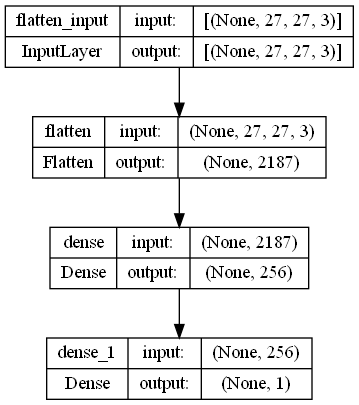

In [25]:
tf.keras.utils.plot_model(base_model, show_shapes=True)

Epoch 1/20
195/195 [==============================] - ETA: 0s - loss: 0.7510 - accuracy: 0.5282
Epoch 1 — macro_f1_train: 0.3004, macro_f1_val: 0.2969
195/195 [==============================] - 23s 113ms/step - loss: 0.7510 - accuracy: 0.5282 - val_loss: 0.7125 - val_accuracy: 0.4222 - f1_macro: 0.3004 - val_f1_macro: 0.2969
Epoch 2/20
194/195 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.5909
Epoch 2 — macro_f1_train: 0.4722, macro_f1_val: 0.3693
195/195 [==============================] - 20s 100ms/step - loss: 0.6840 - accuracy: 0.5927 - val_loss: 0.6289 - val_accuracy: 0.5790 - f1_macro: 0.4722 - val_f1_macro: 0.3693
Epoch 3/20
195/195 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.6347
Epoch 3 — macro_f1_train: 0.4000, macro_f1_val: 0.3547
195/195 [==============================] - 20s 101ms/step - loss: 0.6406 - accuracy: 0.6347 - val_loss: 0.6806 - val_accuracy: 0.4530 - f1_macro: 0.4000 - val_f1_macro: 0.3547
Epoch 4/20
194/195 

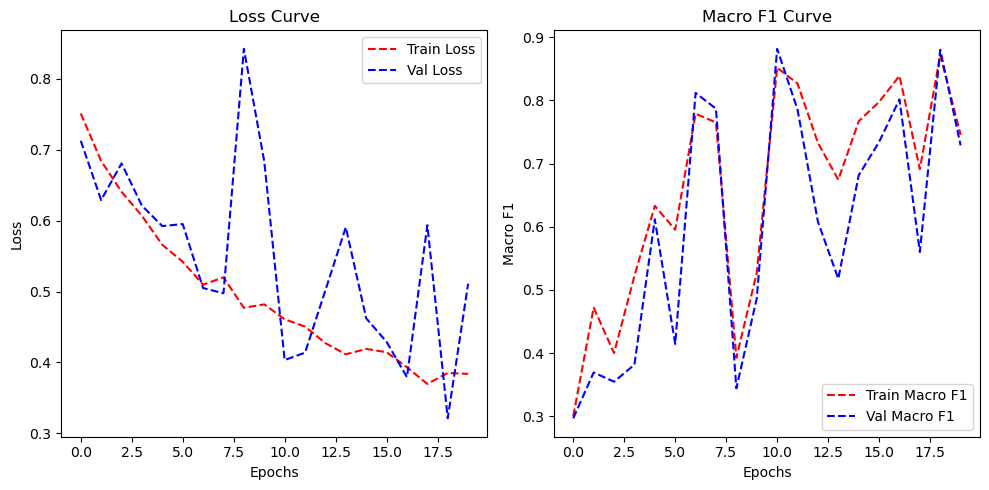

In [26]:
# Training and evaluation

base_model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# --- Train
history = base_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[macro_cb],
    verbose=1,
    batch_size = 32
)

# --- Plot Learning Curve - Loss & F1
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)


PERFORMANCE OF BASELINE MLP model

--- Validation Metrics ---
Loss:     0.5111
Accuracy: 0.7316

Classification Report:
              precision    recall  f1-score   support

           0     0.9831    0.5449    0.7011       958
           1     0.6131    0.9871    0.7564       700

    accuracy                         0.7316      1658
   macro avg     0.7981    0.7660    0.7288      1658
weighted avg     0.8269    0.7316    0.7245      1658

Confusion Matrix:


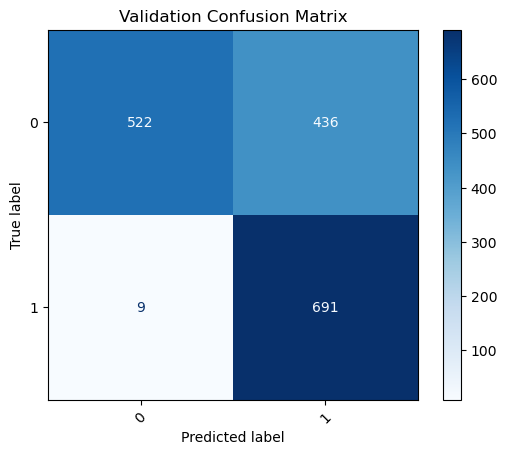

In [27]:
# Show validation metrics
print("PERFORMANCE OF BASELINE MLP model\n")
evaluate_generator("Validation", base_model, validation_generator)

> <span style="font-size:1em;"></span>**Results Inference**
>
>- **High Cancer Detection (Recall₁ = 98.7%)**, but **poor non-cancer detection** (Recall = 54.5%) — the model is overly biased toward predicting the cancerous class.
>- **Macro F1 = 0.73** reflects imbalanced performance across classes despite a decent 73% accuracy.
>- **Validation curve fluctuations** indicate learning instability and limited generalization.
>- Highlights the need for **CNN models** to better extract spatial features and improve class-level separation.


## Incremental Model 1
#### Convolutional Neural Network - cnn_model_1
Convolutional layers can automatically learn and exploit the local spatial and textural patterns in the histopathology patches that a flat MLP cannot capture and this could improve the performance.

#### Model Architecture
- **Input Layer `(27×27×3)`**: Receives single‐channel, normalized image patches.  
- **Conv Block 1**  
  - `Conv2D(32, 3×3, activation='relu', padding='same')`: Learns low‐level edges and textures.  
  - `MaxPooling2D(2×2)`: Halves spatial dimensions, retaining strong activations.  
- **Conv Block 2**  
  - `Conv2D(64, 3×3, activation='relu', padding='same')`: Captures more complex cellular patterns.  
  - `MaxPooling2D(2×2)`: Further reduces feature map size, building translation invariance.  
- **Flatten Layer**: Transforms 2D feature maps into a 1D feature vector.  
- **Dense Layer `(256, relu)`**: Combines spatial features into a compact, nonlinear representation.  
- **Output Layer `(1, sigmoid)`**: Produces a probability score for the binary “cancerous” class.  
- **Optimizer & Loss**: Uses `SGD` with `BinaryCrossentropy` to optimize the probabilistic binary objective.  
- **Training**: Runs for 20 epochs on augmented train/validation generators, tracking loss and accuracy.  


In [30]:
# --- Constants & Input Shape -----------------------------------
INPUT_SHAPE      = (27, 27, 3)  
OUTPUT_CLASSES   = 1            # binary
HIDDEN_UNITS     = 256          

# --- Build basic CNN --------------------------------------------
cnn_model_1 = models.Sequential([
    layers.Input(shape=INPUT_SHAPE),

    # Convolutional block #1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Convolutional block #2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Flatten and dense
    layers.Flatten(),
    layers.Dense(HIDDEN_UNITS, activation='relu'),
    layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

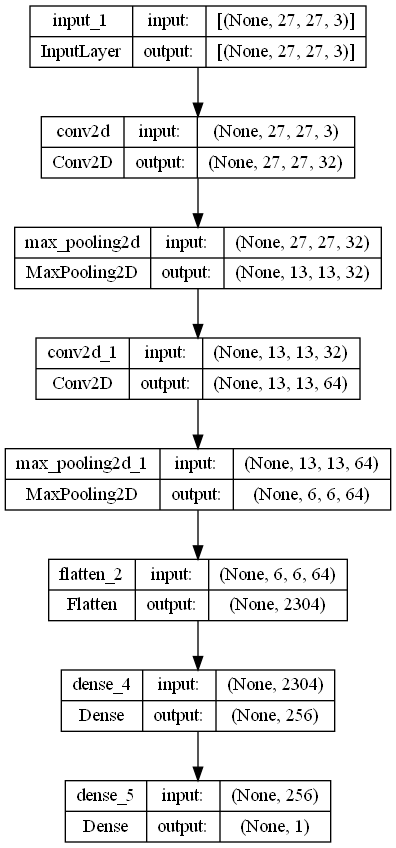

In [31]:
tf.keras.utils.plot_model(cnn_model_1, show_shapes=True)

Epoch 1/20
194/195 [============================>.] - ETA: 0s - loss: 0.6944 - accuracy: 0.5565
Epoch 1 — macro_f1_train: 0.3633, macro_f1_val: 0.3662
195/195 [==============================] - 23s 111ms/step - loss: 0.6934 - accuracy: 0.5588 - val_loss: 0.6687 - val_accuracy: 0.5778 - f1_macro: 0.3633 - val_f1_macro: 0.3662
Epoch 2/20
194/195 [============================>.] - ETA: 0s - loss: 0.6706 - accuracy: 0.5767
Epoch 2 — macro_f1_train: 0.3815, macro_f1_val: 0.3709
195/195 [==============================] - 20s 102ms/step - loss: 0.6706 - accuracy: 0.5773 - val_loss: 0.6548 - val_accuracy: 0.5796 - f1_macro: 0.3815 - val_f1_macro: 0.3709
Epoch 3/20
193/195 [============================>.] - ETA: 0s - loss: 0.6509 - accuracy: 0.6034
Epoch 3 — macro_f1_train: 0.8088, macro_f1_val: 0.8004
195/195 [==============================] - 18s 91ms/step - loss: 0.6532 - accuracy: 0.6009 - val_loss: 0.6397 - val_accuracy: 0.8040 - f1_macro: 0.8088 - val_f1_macro: 0.8004
Epoch 4/20
194/195 [

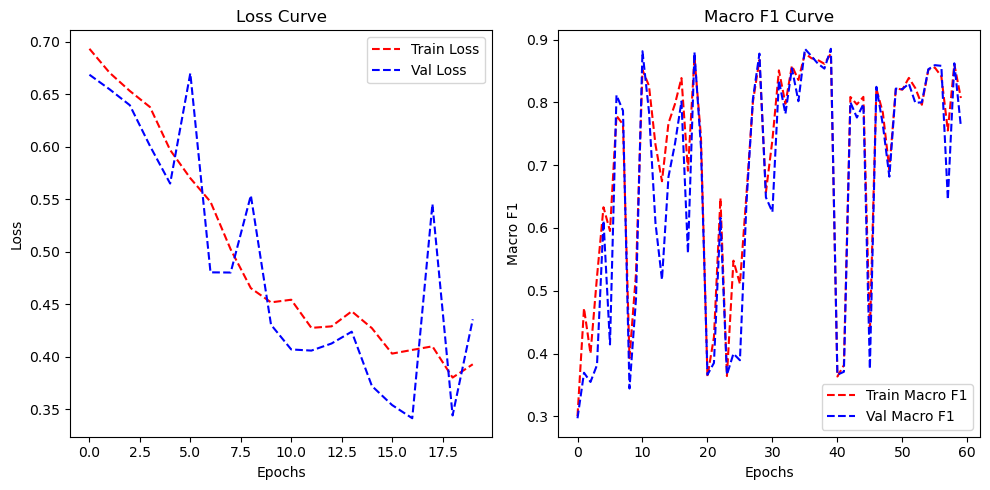

In [32]:
# Training and Evaluation

cnn_model_1.compile(
    optimizer='SGD',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# --- Train CNN --------------------------------------------------
history_cnn = cnn_model_1.fit(
    train_generator,
    validation_data=validation_generator,
    callbacks=[macro_cb],
    epochs=20,
    verbose=1,
    batch_size=32
)
# --- Plot learning curves --------------------------------------
plot_learning_curve(
    history_cnn.history['loss'],
    history_cnn.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)

PERFORMANCE OF BASIC CNN

--- Validation Metrics ---
Loss:     0.4355
Accuracy: 0.7907

Classification Report:
              precision    recall  f1-score   support

           0     0.7400    0.9833    0.8445       958
           1     0.9584    0.5271    0.6802       700

    accuracy                         0.7907      1658
   macro avg     0.8492    0.7552    0.7623      1658
weighted avg     0.8322    0.7907    0.7751      1658

Confusion Matrix:


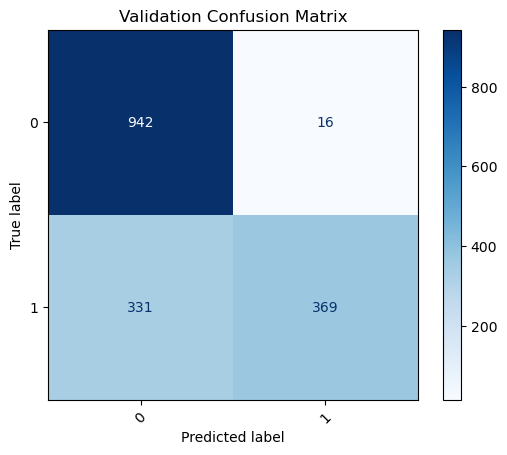

In [33]:
# --- Evaluate on validation ------------
print("PERFORMANCE OF BASIC CNN\n")
evaluate_generator("Validation", cnn_model_1, validation_generator)

> <span style="font-size:1em;"></span> **Result Inference:**
>
>- Less loss and high accuracy than MLP.
>- **Recall Trade-Off**: The CNN model **greatly improves recall for class 0** (non-cancerous) from 54% → **98%**, but recall for class 1 (cancerous) **drops from 99% to 52%**, highlighting a shift in decision boundary.
>- **macro F1-score slightly improves** (from 0.728 → **0.762**)
>- **Issues**: CNN favors high specificity (very few false positives), but **misses many cancerous samples**—potentially risky in a diagnostic setting.

## Incremental Model 2
#### Generalised CNN model- cnn_model_2

To overcome the limitations observed in the baseline CNN, this model introduces architectural and regularization enhancements:
* **Batch Normalization** is added after each convolutional layer to stabilize activations and accelerate convergence.
* **Dropout layers** (50%/30%) are included before dense layers to reduce overfitting, especially on limited histology samples 
* A **third convolutional block** increases model capacity to capture deeper spatial features.
* **GlobalAveragePooling2D** replaces Flatten to reduce the parameter footprint and enhance robustness.

These changes aim to enhance the model’s robustness and class balance, particularly addressing the false negative rate observed in the initial CNN.

In [61]:
# Building Incremental CNN Model with regularisation

from tensorflow.keras import models, layers

INPUT_SHAPE   = (27, 27, 3)
HIDDEN_UNITS  = 128
OUTPUT_CLASSES = 1

cnn_model_2 = models.Sequential([
    # Input
    layers.Input(shape=INPUT_SHAPE),

    # Conv Block #1
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Conv Block #2
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Conv Block #3
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Global pooling & heads
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),            # regularization
    layers.Dense(HIDDEN_UNITS, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])


Epoch 1/20
195/195 [==============================] - ETA: 0s - loss: 0.1603 - accuracy: 0.9377
Epoch 1 — macro_f1_train: 0.7907, macro_f1_val: 0.7499
195/195 [==============================] - 9s 35ms/step - loss: 0.1603 - accuracy: 0.9377 - val_loss: 0.4988 - val_accuracy: 0.7509 - f1_macro: 0.7907 - val_f1_macro: 0.7499
Epoch 2/20
195/195 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9515
Epoch 2 — macro_f1_train: 0.6355, macro_f1_val: 0.6095
195/195 [==============================] - 7s 36ms/step - loss: 0.1388 - accuracy: 0.9515 - val_loss: 0.9389 - val_accuracy: 0.6104 - f1_macro: 0.6355 - val_f1_macro: 0.6095
Epoch 3/20
194/195 [============================>.] - ETA: 0s - loss: 0.1350 - accuracy: 0.9532
Epoch 3 — macro_f1_train: 0.8153, macro_f1_val: 0.7745
195/195 [==============================] - 7s 36ms/step - loss: 0.1344 - accuracy: 0.9535 - val_loss: 0.4047 - val_accuracy: 0.7931 - f1_macro: 0.8153 - val_f1_macro: 0.7745
Epoch 4/20
195/195 [=====

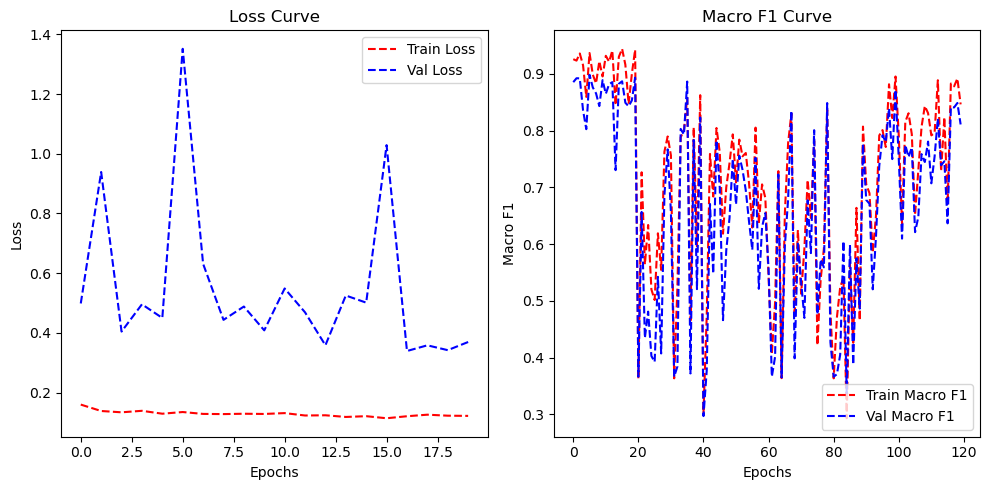

In [64]:
# 3) Compile
cnn_model_2.compile(
    optimizer='SGD',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 4) Train
history = cnn_model_2.fit(
    train_generator,
    validation_data=validation_generator,
    callbacks=[macro_cb],
    epochs=20,
    verbose=1,
    batch_size=32
)

# 5) Plot curves & evaluate
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)


PERFORMANCE OF REGULARISED CNN

--- Validation Metrics ---
Loss:     0.3697
Accuracy: 0.8118

Classification Report:
              precision    recall  f1-score   support

           0     0.8892    0.7704    0.8255       958
           1     0.7343    0.8686    0.7958       700

    accuracy                         0.8118      1658
   macro avg     0.8117    0.8195    0.8107      1658
weighted avg     0.8238    0.8118    0.8130      1658

Confusion Matrix:


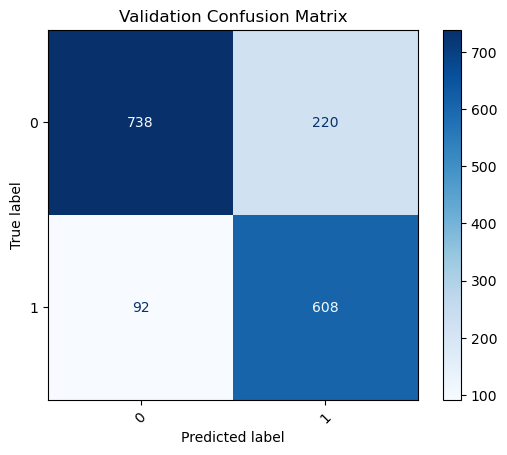

In [65]:
print("PERFORMANCE OF REGULARISED CNN\n")
evaluate_generator("Validation",   cnn_model_2, validation_generator)

In [66]:
# save model
cnn_model_2.save('cnn_model_2_cancer.h5', include_optimizer=True) 

> <span style="font-size:1em;"></span>**Result Inference:**
>- **Improved Generalization**: The model achieved **81.2% validation accuracy** with a **macro F1-score of 0.81** - best so far.
>- **Class-wise Trade-Off**:
>      * Non-cancerous (class 0): lower false positives, but some missed negatives.
>      * Cancerous (class 1): **Improved score** — stronger sensitivity to cancer detection, though with moderate false alarms.
>- **Training Behavior**:
>      * **Stable Training Loss** suggests effective convergence.
>      * **Fluctuating Validation Loss** is observed, a common pattern in binary classification tasks due to batch variance, class imbalance, or dropout noise. Despite this, macro F1 remains stable, showing robust performance.

> **Final thoughts**: The addition of **Batch Normalization**, **Dropout**, and **Global Average Pooling** successfully mitigated overfitting and improved class balance. This model now serves as a stronger foundation for further improvement.

>**Next Steps**: Incorporate **class weighting** and **in-model data augmentation** to enhance recall on minority (cancerous) samples and improve generalization further.


## Incremental Model 3
#### Applying Augmentation & Class-weight balancing to cnn_model_2

##### Handling Class Imbalance
To address the significant class imbalance—particularly for underrepresented classes like "others"—the following strategies were applied:
- **Class Weight Balancing**: Class weights were computed and assigned inversely proportional to class frequencies. This helps the model place greater emphasis on minority classes during training, reducing bias toward majority classes and improving recall for rare labels.([source](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/))
- **Targeted Data Augmentation**: Augmentation techniques such as horizontal/vertical flips, zooming, and rotations were applied more frequently to minority class samples. This synthetic diversity increases the effective training size for rare classes and improves the model's ability to generalize across varied spatial patterns.


Found 6231 validated image filenames belonging to 2 classes.
Epoch 1/20
195/195 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8376
Epoch 1 — macro_f1_train: 0.7192, macro_f1_val: 0.6158
195/195 [==============================] - 12s 58ms/step - loss: 0.3928 - accuracy: 0.8376 - val_loss: 1.0169 - val_accuracy: 0.6942 - f1_macro: 0.7192 - val_f1_macro: 0.6158
Epoch 2/20
195/195 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.8645
Epoch 2 — macro_f1_train: 0.8669, macro_f1_val: 0.8589
195/195 [==============================] - 14s 68ms/step - loss: 0.3328 - accuracy: 0.8645 - val_loss: 0.3374 - val_accuracy: 0.8667 - f1_macro: 0.8669 - val_f1_macro: 0.8589
Epoch 3/20
195/195 [==============================] - ETA: 0s - loss: 0.3085 - accuracy: 0.8716
Epoch 3 — macro_f1_train: 0.8967, macro_f1_val: 0.8827
195/195 [==============================] - 14s 69ms/step - loss: 0.3085 - accuracy: 0.8716 - val_loss: 0.2689 - val_accuracy: 0.8854 - f

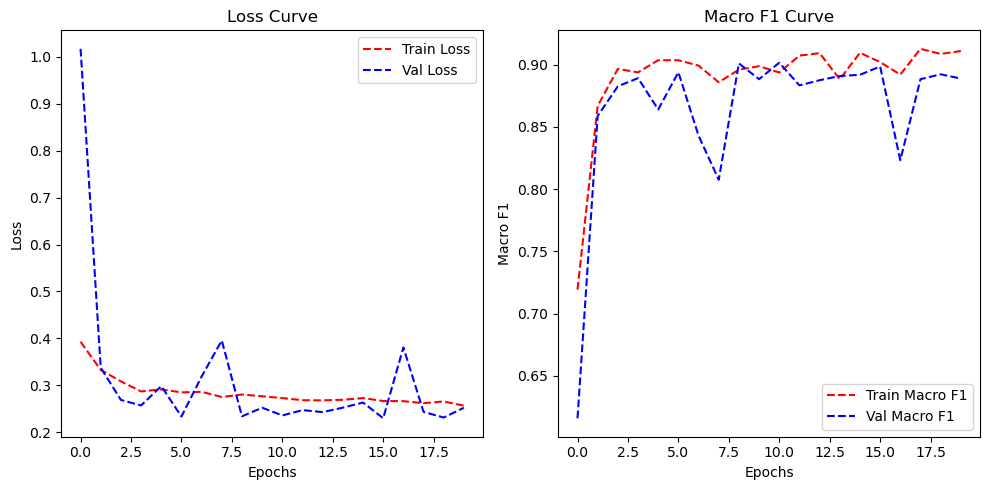

In [22]:
from tensorflow.keras.models import load_model

#  Load the model
best_model = load_model('cnn_model_2_cancer.h5')

# 1) augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.01,
    height_shift_range=0.01,
    brightness_range=(0.8,1.2),
    horizontal_flip=True,
    vertical_flip = True
)

train_gen = train_datagen.flow_from_dataframe(
    train_df, IMG_DIR, x_col='ImageName', y_col='isCancerous',
    target_size=(27,27), batch_size=32, shuffle=True, seed=42, class_mode='binary'
)

# compute class weights
from sklearn.utils.class_weight import compute_class_weight
cw = compute_class_weight('balanced', classes=[0,1], y=train_df['isCancerous'].astype(int))
class_weight = {0: cw[0], 1: cw[1]}

macro_cb = MacroF1Callback(train_generator, validation_generator)


# 4) train with class weights
history = best_model.fit(
    train_gen,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[macro_cb],
    class_weight=class_weight
)

# 5) Plot curves & evaluate
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)


PERFORMANCE OF cnn_model_2 AFTER DATA AUGMENTATION & CLASS WEIGHT BALANCING

---  Validation Metrics ---
Loss:     0.2523
Accuracy: 0.8908

Classification Report:
              precision    recall  f1-score   support

           0     0.9227    0.8852    0.9036       958
           1     0.8512    0.8986    0.8742       700

    accuracy                         0.8908      1658
   macro avg     0.8869    0.8919    0.8889      1658
weighted avg     0.8925    0.8908    0.8912      1658

Confusion Matrix:


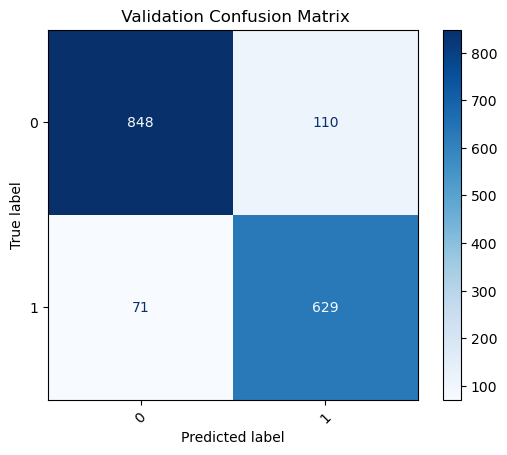

In [23]:
print("PERFORMANCE OF cnn_model_2 AFTER DATA AUGMENTATION & CLASS WEIGHT BALANCING\n")
evaluate_generator(" Validation",   best_model, validation_generator)

In [57]:
best_model.save('cancer_cnn_best.h5', include_optimizer=True) 

> <span style="font-size:1em;"></span>**Result Inference – Final Model:**
>- **Strong Generalization**: With macro F1 nearing 0.89 on both train and validation, the model shows consistent learning and minimal overfitting. Train loss remains stable while validation loss exhibits small spikes, a typical sign of noisy but generalizable learning in medical image data.
>- **Improved Balanced Performance**: Achieves 89.1% validation accuracy, significantly surpassing prior models. 
>     * **Cancerous (1)**: Recall ≈ 89.9% ensures most positive cases are caught.
>     * **Non-Cancerous (0)**: Precision ≈ 92.3% reduces false alarms.
>* This version **meets both performance and robustness goals—suitable as the final deployed model**.

## MODEL PERFORMANCE ON TEST DATA

Evaluating test data with the best model.

Found 2007 validated image filenames belonging to 2 classes.
PERFORMANCE OF BEST MODEL ON TEST DATAG

--- Test Metrics ---
Loss:     0.2805
Accuracy: 0.8944

Classification Report:
              precision    recall  f1-score   support

           0     0.9212    0.9156    0.9184      1303
           1     0.8455    0.8551    0.8503       704

    accuracy                         0.8944      2007
   macro avg     0.8834    0.8853    0.8843      2007
weighted avg     0.8947    0.8944    0.8945      2007

Confusion Matrix:


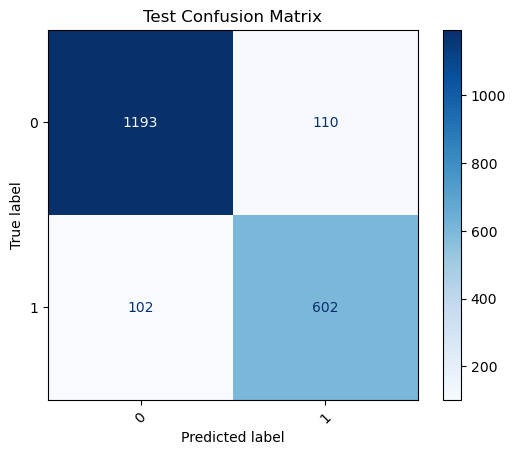

In [69]:
# 1) Build a test generator with labels
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='isCancerous',
    target_size=(27,27),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

# 2) Evaluate
print("PERFORMANCE OF BEST MODEL ON TEST DATA\n")
evaluate_generator("Test", best_model, test_generator)  


#### Final Test Inference (Best Model)
* Achieved **89.4% accuracy** with strong generalization of **macro F1-score ≈ 0.88** on unseen data.
* **Cancer recall: 85.5%**, **precision: 84.5%** — balanced and reliable detection.
* Healthy class handled well with **\~92% precision/recall**.
* Low test loss (0.28) confirms stability and readiness for deployment.


**Table 1**
## PERFORMANCE SUMMARY OF CANCER PREDICTION MODELS

#### (1a)Validation Performance

| Model                | Architecture Description                                     | Accuracy | Loss   | Macro F1 | Key Improvements                                                                 |
|---------------------|--------------------------------------------------------------|----------|--------|----------|-----------------------------------------------------------------------------------|
| Baseline (MLP)      | Fully connected layers on flattened patches                 | 0.7316   | 0.5111 | 0.7288   | High recall for class (1); low recall for class (0); shows class imbalance impact |
| Model 1 – Basic CNN | 2 Conv layers + MaxPooling + Dense                         | 0.7907   | 0.4355 | 0.7623   | Improved recall for class (0); class (1) recall drops—imbalance trade-off        |
| Model 2 – Regularised CNN | Model 1 + 3rd layer + BatchNorm + Dropout + GlobalAvgPooling     | 0.8118   | 0.3697 | 0.8107   | Balanced recall and precision; less overfitting; better generalization            |
| Model 3 – Final CNN | Model 2 + Data Augmentation + Class Weights                | 0.8908   | 0.2523 | 0.8889   | High precision (0) and recall (1); strong generalization and robustness           |

#### (1b)Test Performance (Best Model)

| Model        | Architecture Summary                            | Accuracy | Loss   | Macro F1 | Key Insights                                                      |
|--------------|--------------------------------------------------|----------|--------|----------|-------------------------------------------------------------------|
| Final Model  | Regularised CNN with Augmentation & Class Weights| 0.8944   | 0.2805 | 0.8843   | High performance on unseen data; balanced and reliable predictions |


**Table 2**
## INDEPENDENT EVALUATION - Cancer prediction

### Comparative Analysis with Literature and Baseline


| Model                          | Source                            | Accuracy | Macro F1 | Loss  |
|-------------------------------|-----------------------------------|----------|----------|-------|
| **Our Final CNN Model (Test)**| This Work                         | **0.8944** | **0.8843** | 0.2805 |
| Baseline MLP                  | This Work                         | 0.7316   | 0.7288   | 0.5111 |
| MobileNet (Best)              | Öztürk et al. (2024), Sci. Rep.   | ~0.999    | 0.999    | 0.045  |
| Standard CNN                  | Öztürk et al. (2024), Sci. Rep.   | 0.500    | 0.500    | 0.693  |

- Our MLP baseline and final CNN substantially outperform the Standard CNN from Öztürk et al., demonstrating stronger model design and training without pretrained backbones.
- The final model achieves **89.4% accuracy** and **0.88 macro F1**, showing competitive performance even against MobileNet's transfer learning-based results.
- The referenced top models (e.g., MobileNet) rely on **heavy pretraining (e.g., ImageNet)**, which was not used in our work. Our CNN was trained from scratch, under stricter resource and fairness constraints.


---

### Fairness & Consistency

- **Evaluation Scope**: All our models were trained and tested under **patient-level splits** using consistent metrics (accuracy, macro F1, and loss), ensuring fair comparison.
- **Model Differences**: Öztürk et al.'s pretrained networks benefit from large-scale external datasets, while our model was **entirely self-trained** on the provided histopathology images.
- **Insightful Progression**: The final CNN shows a clear performance leap over the baseline MLP and the referenced standard CNN, supporting the reliability of our model design choices.

**Final Note**: While MobileNet achieves near-perfect scores, it benefits from prior external knowledge. Our model achieves strong performance using only in-domain training, underscoring the effectiveness of architecture, data augmentation, and regularization strategies, this evaluation confirms that our custom CNN generalizes well without external dependencies—an important consideration in real-world clinical pipelines.


# DATA PREPARATION & MODELLING - cell type classification

### GOAL
Classify images according to cell-type, such as: fibroblast, inflammatory, epithelial or others.

### Data Splitting

In [58]:
# Train-Val-Test split on main_data

# --- 1) Prepare dataframe with only main_data cell‐type samples ---
main_df_type = main_data[['InstanceID', 'patientID', 'ImageName', 'cellType']].copy()
print("Original main_data shape:", main_df_type.shape)
print(main_df_type['cellType'].value_counts())

# --- 2) Compute each patient’s majority cellType (mode) ---
patient_majority_type = (
    main_df_type
    .groupby('patientID')['cellType']
    .agg(lambda x: x.mode()[0])
    .reset_index()
)
patient_majority_type.columns = ['patientID', 'major_cellType']
print("\nPatient majority cellType distribution:")
print(patient_majority_type['major_cellType'].value_counts())

# --- 3) Patient‐level train/temp split (60% train, 40% temp) ---
train_p, temp_p = train_test_split(
    patient_majority_type['patientID'],
    test_size=0.4,
    stratify=patient_majority_type['major_cellType'],
    random_state=42
)

# --- 4) Temp → val/test split (each 20% total) ---
temp_meta = patient_majority_type.set_index('patientID').loc[temp_p]
val_p, test_p = train_test_split(
    temp_p,
    test_size=0.5,
    stratify=temp_meta['major_cellType'],
    random_state=42
)

# --- 5) Build the actual splits ---
train_df_type = main_df_type[main_df_type['patientID'].isin(train_p)].reset_index(drop=True)
val_df_type   = main_df_type[main_df_type['patientID'].isin(val_p)].reset_index(drop=True)
test_df_type  = main_df_type[main_df_type['patientID'].isin(test_p)].reset_index(drop=True)

print("\nSplit shapes:")
print(" Train:", train_df_type.shape)
print(" Val:  ", val_df_type.shape)
print(" Test: ", test_df_type.shape)

# Sanity check: no patient overlap
assert set(train_p) & set(val_p)   == set()
assert set(train_p) & set(test_p)  == set()
assert set(val_p)   & set(test_p)  == set()
print("No patient overlap across splits.")


for df in (train_df_type, val_df_type, test_df_type):
    df['cellType'] = df['cellType'].astype(str)

Original main_data shape: (9896, 4)
cellType
2    4079
1    2543
0    1888
3    1386
Name: count, dtype: int64

Patient majority cellType distribution:
major_cellType
2    25
1    15
0    11
3     9
Name: count, dtype: int64

Split shapes:
 Train: (6152, 4)
 Val:   (2092, 4)
 Test:  (1652, 4)
No patient overlap across splits.


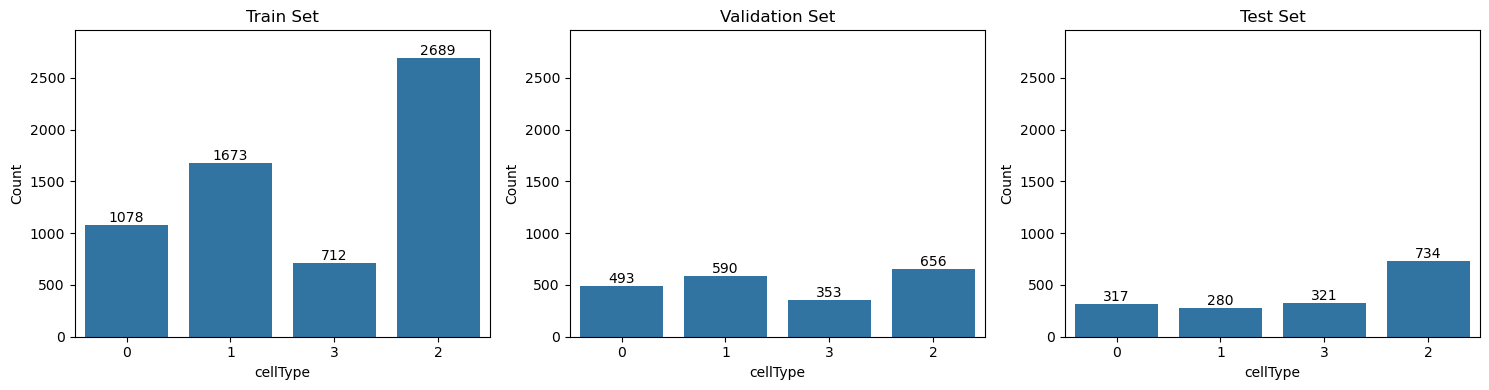

In [59]:
# Split distribution
plot_split_distribution([train_df_type, val_df_type, test_df_type], ["Train", "Validation", "Test"],label_col='cellType')

> <span style="font-size:1em;"></span> **Observations:**
> * Still significant class imbalance: epithelial cells (class 2) are 2–3× more frequent than others, especially in the train set.
> * Validation and test sets are somewhat imbalanced too — which can skew performance metrics like accuracy, hence track macro f1.
So stratergies like Class-Weighted Loss, data augmentation could boost perfromace.

### Normalisation

In [60]:
# Normalisation

train_datagen = ImageDataGenerator(
    rescale=1./255
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)

batch_size = 32
target_size = (27, 27)

# --- Train generator ---
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df_type,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=target_size,
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False
)

# --- Validation generator ---
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df_type,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=target_size,
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False
)

Found 6152 validated image filenames belonging to 4 classes.
Found 2092 validated image filenames belonging to 4 classes.


In [26]:
# Supporting Function

# Macro F1 for multi class
class MacroF1Callback(tf.keras.callbacks.Callback):
    def __init__(self, train_gen, val_gen):
        super().__init__()
        self.train_gen = train_gen
        self.val_gen   = val_gen
        self.train_f1  = []
        self.val_f1    = []

    def on_epoch_end(self, epoch, logs=None):
        # TRAIN
        steps_tr = int(np.ceil(self.train_gen.samples / self.train_gen.batch_size))
        self.train_gen.reset()
        y_prob_tr = self.model.predict(self.train_gen, steps=steps_tr, verbose=0)
        y_true_tr = self.train_gen.classes
        y_pred_tr = np.argmax(y_prob_tr, axis=1)
        f1_tr = f1_score(y_true_tr, y_pred_tr, average='macro')
        self.train_f1.append(f1_tr)

        # VAL
        steps_val = int(np.ceil(self.val_gen.samples / self.val_gen.batch_size))
        self.val_gen.reset()
        y_prob_val = self.model.predict(self.val_gen, steps=steps_val, verbose=0)
        y_true_val = self.val_gen.classes
        y_pred_val = np.argmax(y_prob_val, axis=1)
        f1_v = f1_score(y_true_val, y_pred_val, average='macro')
        self.val_f1.append(f1_v)

        print(f"\nEpoch {epoch+1} — macro_f1_train: {f1_tr:.4f}, macro_f1_val: {f1_v:.4f}")

        if logs is not None:
            logs['f1_macro']     = f1_tr
            logs['val_f1_macro'] = f1_v


## Baseline Model - MLP

***softmax* as output activation function(multi-class) and *relu* for hidden layer.**

Epoch 1/20
192/193 [============================>.] - ETA: 0s - loss: 1.4361 - accuracy: 0.3928
Epoch 1 — macro_f1_train: 0.0746, macro_f1_val: 0.0954
193/193 [==============================] - 23s 113ms/step - loss: 1.4336 - accuracy: 0.3960 - val_loss: 1.5428 - val_accuracy: 0.2357 - f1_macro: 0.0746 - val_f1_macro: 0.0954
Epoch 2/20
192/193 [============================>.] - ETA: 0s - loss: 1.3326 - accuracy: 0.4203
Epoch 2 — macro_f1_train: 0.1521, macro_f1_val: 0.1194
193/193 [==============================] - 20s 104ms/step - loss: 1.3283 - accuracy: 0.4233 - val_loss: 1.6315 - val_accuracy: 0.3136 - f1_macro: 0.1521 - val_f1_macro: 0.1194
Epoch 3/20
191/193 [============================>.] - ETA: 0s - loss: 1.2756 - accuracy: 0.4340
Epoch 3 — macro_f1_train: 0.1847, macro_f1_val: 0.1974
193/193 [==============================] - 18s 91ms/step - loss: 1.2764 - accuracy: 0.4317 - val_loss: 1.4585 - val_accuracy: 0.3623 - f1_macro: 0.1847 - val_f1_macro: 0.1974
Epoch 4/20
191/193 [

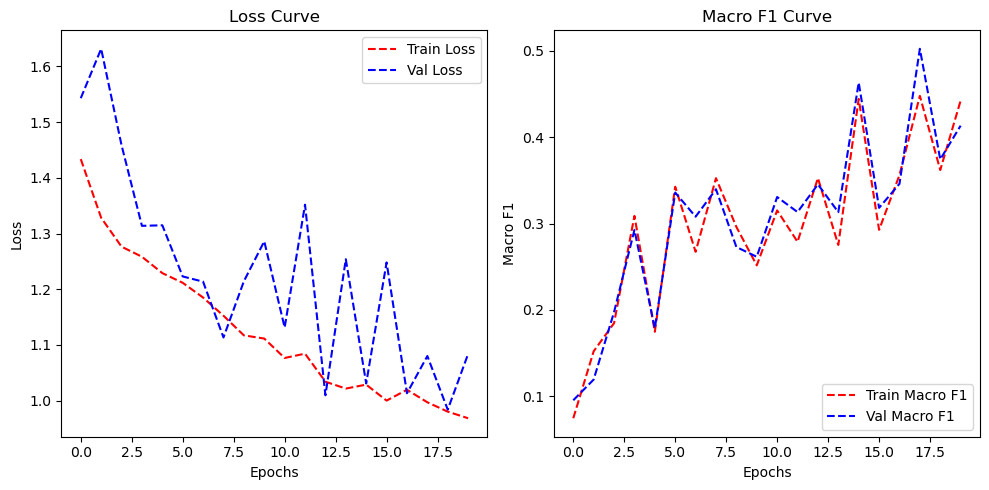

In [27]:
# MLP

# --- 1) Constants & Input shape ---
INPUT_SHAPE    = (27, 27, 3)
OUTPUT_CLASSES = len(train_generator.class_indices)  # e.g. 4 for fibroblast, inflammatory, epithelial, others
HIDDEN_LAYER_DIM = 256

macro_cb = MacroF1Callback(train_generator, validation_generator)

# --- 2) Build the MLP model for cell-type classification ---
baseline_celltype = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])


# --- 3) Compile with sparse categorical loss for integer labels ---
baseline_celltype.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 4) Train on the generators ---
history_celltype = baseline_celltype.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    batch_size = 64,
    verbose=1,
    callbacks=[macro_cb]
)

# --- 5) Plot learning curves ---
plot_learning_curve(
    history_celltype.history['loss'],
    history_celltype.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)


PERFORMANCE OF BASELINE MLP

--- Validation Metrics ---
Loss:     1.0839
Accuracy: 0.5033

Classification Report:
              precision    recall  f1-score   support

           0     0.3322    0.9493    0.4921       493
           1     0.7798    0.2881    0.4208       590
           2     0.8925    0.6326    0.7404       656
           3     0.0000    0.0000    0.0000       353

    accuracy                         0.5033      2092
   macro avg     0.5011    0.4675    0.4133      2092
weighted avg     0.5781    0.5033    0.4668      2092

Confusion Matrix:


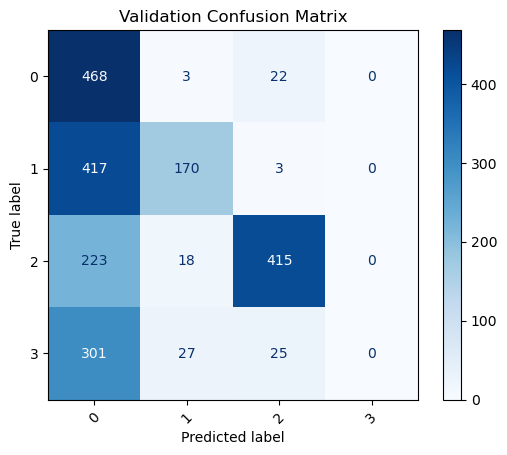

In [28]:
print("PERFORMANCE OF BASELINE MLP\n")
evaluate_generator("Validation",   baseline_celltype, validation_generator)

> <span style="font-size:1em;"></span>**Result Inference:**
>- **Validation Accuracy**: 50.3%  
>- **Macro F1-Score**: 0.41 — low performance across most classes.  
>- Performs best on **Class 2 (epithelial)**; **Class 3 (others)** is completely unrecognized.  
>- **Issues Identified**:
>     - **Underfitting**: MLP lacks spatial awareness to learn from image patches.
>     - **Class Imbalance**: Minority classes like "others" and "fibroblast" are poorly learned.
>- **Loss Curves**:
>     - Train loss decreases smoothly → learning occurs.
>     - Validation loss fluctuates → model instability and poor generalization.
>- **Final thoughts**: MLP fails to capture spatial patterns and struggles with imbalance; convolutional models are needed next.


## Incremental model 1 - CNN
#### Basic 2-block CNN

Epoch 1/20
193/193 [==============================] - ETA: 0s - loss: 1.3412 - accuracy: 0.4080
Epoch 1 — macro_f1_train: 0.1521, macro_f1_val: 0.1194
193/193 [==============================] - 23s 115ms/step - loss: 1.3412 - accuracy: 0.4080 - val_loss: 1.3664 - val_accuracy: 0.3136 - f1_macro: 0.1521 - val_f1_macro: 0.1194
Epoch 2/20
192/193 [============================>.] - ETA: 0s - loss: 1.2997 - accuracy: 0.4386
Epoch 2 — macro_f1_train: 0.1521, macro_f1_val: 0.1194
193/193 [==============================] - 21s 106ms/step - loss: 1.3004 - accuracy: 0.4371 - val_loss: 1.3856 - val_accuracy: 0.3136 - f1_macro: 0.1521 - val_f1_macro: 0.1194
Epoch 3/20
192/193 [============================>.] - ETA: 0s - loss: 1.2832 - accuracy: 0.4394
Epoch 3 — macro_f1_train: 0.1521, macro_f1_val: 0.1194
193/193 [==============================] - 20s 103ms/step - loss: 1.2844 - accuracy: 0.4371 - val_loss: 1.3608 - val_accuracy: 0.3136 - f1_macro: 0.1521 - val_f1_macro: 0.1194
Epoch 4/20
192/193 

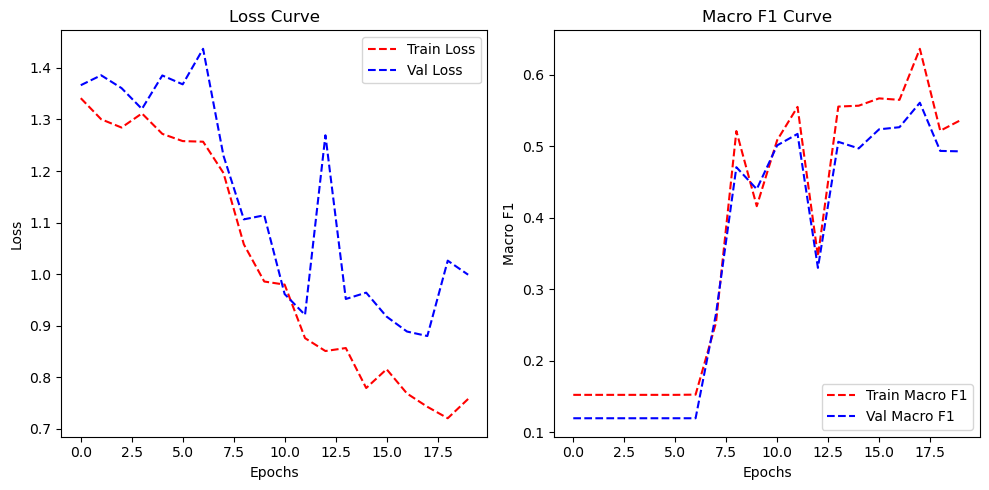

In [29]:

# Define reusable parameters
INPUT_SHAPE   = (27, 27, 3)
HIDDEN_UNITS  = 128
NUM_CLASSES   = 4
DROPOUT_RATE  = 0.3

# Callback for macro f1
macro_cb = MacroF1Callback(train_generator, validation_generator)

# --- Model architecture ---
cnn_celltype = models.Sequential([
    layers.Input(shape=INPUT_SHAPE),

    # Conv block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Conv block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(HIDDEN_UNITS, activation='relu'),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# --- Build model ---
cnn_celltype.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ---  Train on the generators ---
history_celltype = cnn_celltype.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    batch_size = 64,
    verbose=1,
    callbacks=[macro_cb]
)

# ---  Plot learning curves ---
plot_learning_curve(
    history_celltype.history['loss'],
    history_celltype.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)

PERFORMANCE OF CNN

--- Validation Metrics ---
Loss:     0.9990
Accuracy: 0.6171

Classification Report:
              precision    recall  f1-score   support

           0     0.4474    0.5091    0.4763       493
           1     0.6983    0.7610    0.7283       590
           2     0.6663    0.9009    0.7660       656
           3     0.0000    0.0000    0.0000       353

    accuracy                         0.6171      2092
   macro avg     0.4530    0.5428    0.4927      2092
weighted avg     0.5113    0.6171    0.5579      2092

Confusion Matrix:


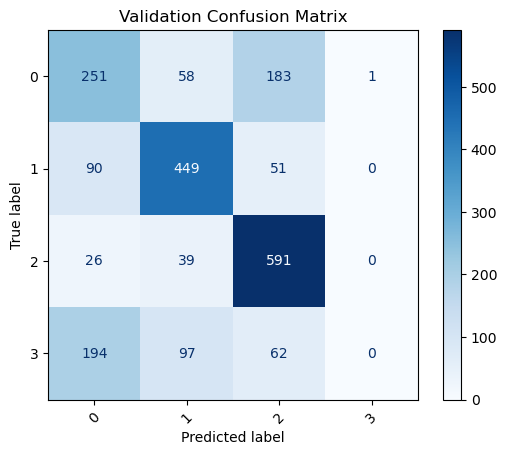

In [30]:
print("PERFORMANCE OF CNN\n")
evaluate_generator("Validation",   cnn_celltype, validation_generator)

> <span style="font-size:1em;"></span>**Result Inference:**
>- **Performance Gains**: Validation accuracy improves to 61.7% and macro F1 increases to 0.49, outperforming the baseline MLP (50.3%, macro F1 0.41).
>- **Improved Recognition**: Classes 1 and 2 are better learned, with class 2 (epithelial) achieving high recall (90%).
>- **Persistent Issues**: Class 3 ("others") is still completely unrecognized, with zero recall and precision—indicating **severe underfitting on rare classes**.
>- **Root Cause**: Lack of class balancing and augmentation causes the model to focus on majority classes, ignoring underrepresented types like class 3.


## Incremental model 2 

#### 2 block CNN with data augmentation, class weight balancing & Dropout(for regularization)

Found 6152 validated image filenames belonging to 4 classes.
Epoch 1/20
193/193 [==============================] - ETA: 0s - loss: 1.2264 - accuracy: 0.4725
Epoch 1 — macro_f1_train: 0.5695, macro_f1_val: 0.4413
193/193 [==============================] - 25s 126ms/step - loss: 1.2264 - accuracy: 0.4725 - val_loss: 1.0980 - val_accuracy: 0.4957 - f1_macro: 0.5695 - val_f1_macro: 0.4413
Epoch 2/20
193/193 [==============================] - ETA: 0s - loss: 0.9687 - accuracy: 0.6468
Epoch 2 — macro_f1_train: 0.6276, macro_f1_val: 0.5140
193/193 [==============================] - 22s 111ms/step - loss: 0.9687 - accuracy: 0.6468 - val_loss: 0.9916 - val_accuracy: 0.5296 - f1_macro: 0.6276 - val_f1_macro: 0.5140
Epoch 3/20
193/193 [==============================] - ETA: 0s - loss: 0.8994 - accuracy: 0.6811
Epoch 3 — macro_f1_train: 0.6778, macro_f1_val: 0.5932
193/193 [==============================] - 25s 127ms/step - loss: 0.8994 - accuracy: 0.6811 - val_loss: 0.8795 - val_accuracy: 0.6238 

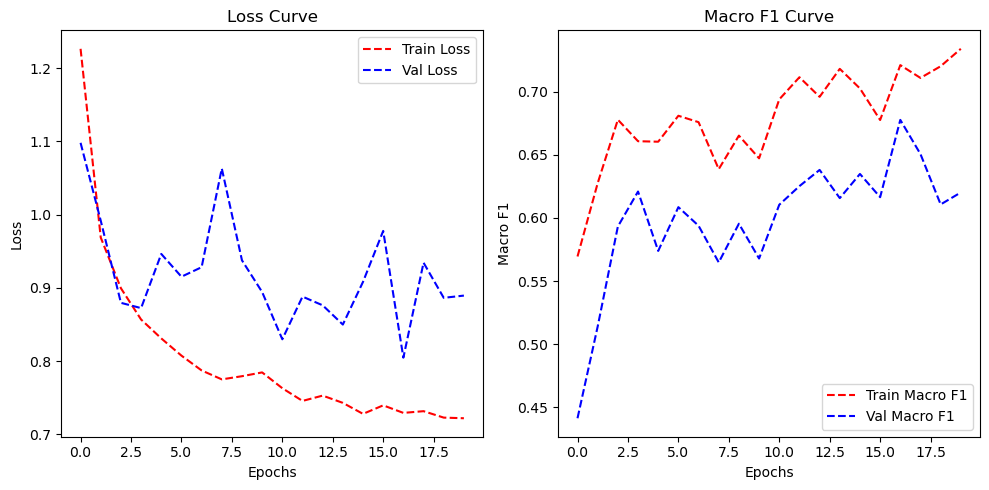

--- Incremental CNN Metrics ---
Loss:     0.8893
Accuracy: 0.6291

Classification Report:
              precision    recall  f1-score   support

           0     0.5781    0.5781    0.5781       493
           1     0.8000    0.4814    0.6011       590
           2     0.9141    0.7622    0.8313       656
           3     0.3544    0.6997    0.4705       353

    accuracy                         0.6291      2092
   macro avg     0.6616    0.6303    0.6202      2092
weighted avg     0.7083    0.6291    0.6458      2092

Confusion Matrix:


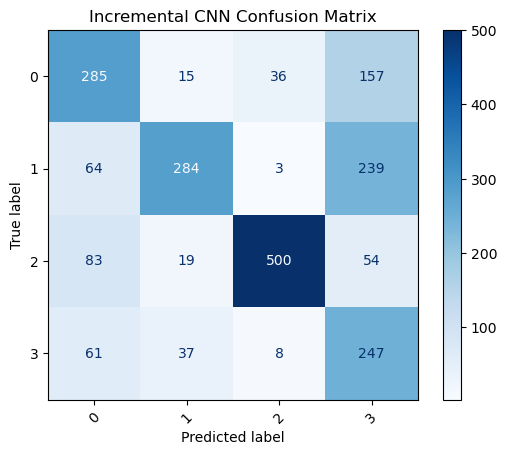

In [32]:
# Define reusable parameters
INPUT_SHAPE   = (27, 27, 3)
HIDDEN_UNITS  = 128
NUM_CLASSES   = 4
DROPOUT_RATE  = 0.3
BATCH_SIZE = 32


# --- 1) Data generators ---
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df_type,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    class_mode='sparse'
)

macro_cb = MacroF1Callback(train_generator, validation_generator)

# --- 2) Compute class weights ---
y_train = train_df_type['cellType'].astype(int).values
classes = np.unique(y_train)
cw = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = dict(zip(classes, cw))

# --- 3) Build Model ---
cnn_celltype_2 = models.Sequential([
    layers.Input(shape=INPUT_SHAPE),

    # Conv block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Conv block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(HIDDEN_UNITS, activation='relu'),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


cnn_celltype_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 4) Train on the generators ---
history_celltype = cnn_celltype_2.fit(
    train_gen,
    validation_data=validation_generator,
    class_weight=class_weight,
    epochs=20,
    batch_size = 32,
    verbose=1,
    callbacks=[macro_cb]
)

# --- 5) Plot learning curves ---
plot_learning_curve(
    history_celltype.history['loss'],
    history_celltype.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)

# evaluate on validation data
evaluate_generator("Incremental CNN", cnn_celltype_2, validation_generator)

> <span style="font-size:1em;"></span>**Result Inference:**
>- **Improved Class Balance**: Macro F1 rose to 0.62, a noticeable improvement over previous models.
>- **Rare Class Recovery**: Class 3 ("others") recall jumped from 0.00 to 0.70, showing the impact of class weighting and augmentation.
>- **Epithelial (2) remains strong** with high precision and recall (F1 ≈ 0.83).
>- **Trade-off**: Class 1 (inflammatory) recall dropped (0.76 → 0.48), possibly due to over-penalization from class weights.
>- **Remaining Issue**: Overall accuracy still modest at 63%, with confusion across minority classes.
>- **Val loss fluctuations persist**, suggesting class imbalance and batch-level variance still affect learning stability.


## Incremental model 3(Final)

#### Parameter tuning to find the best configuration on incremental model 2

In [103]:
# Grid search to find the best parameters

# --- 0) Prepare data & class weights once ---
# (reuse train_df_type, val_df_type, IMG_DIR)
y_train = train_df_type['cellType'].astype(int).values
classes = np.unique(y_train)
cw = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = dict(zip(classes, cw))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Parameter grid
param_grid = {
    'lr':       [1e-3, 5e-4],
    'l2':       [1e-4, 1e-5],
    'dropout':  [0.2, 0.3],
    'bs':       [32, 64]
}

results = []

# --- 1) Loop over all combinations ---
for lr, l2, dropout, bs in itertools.product(
        param_grid['lr'],
        param_grid['l2'],
        param_grid['dropout'],
        param_grid['bs']
    ):
    print(f"\n>> Testing lr={lr}, l2={l2}, dropout={dropout}, batch_size={bs}")

    # 2) Build a fresh model
    model = models.Sequential([
        layers.Input((27,27,3)),

        # layer 1
        layers.Conv2D(32,3,padding='same',
                      kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(), layers.Activation('relu'),
        layers.MaxPooling2D(),

        # layer 2
        layers.Conv2D(64,3,padding='same',
                      kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(), layers.Activation('relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dropout(dropout),
        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(4, activation='softmax',
                     kernel_regularizer=regularizers.l2(l2))
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # 3) Prepare generators for this batch size
    train_gen = train_datagen.flow_from_dataframe(
        train_df_type, IMG_DIR,
        x_col='ImageName', y_col='cellType',
        target_size=(27,27), batch_size=bs,
        shuffle=True, class_mode='sparse'
    )
    val_gen = val_datagen.flow_from_dataframe(
        val_df_type, IMG_DIR,
        x_col='ImageName', y_col='cellType',
        target_size=(27,27), batch_size=bs,
        shuffle=False, class_mode='sparse'
    )

    # 4) Callbacks
    macro_cb = MacroF1Callback(train_gen, val_gen)
    early_stop = EarlyStopping(
        monitor='val_f1_macro', mode='max',
        patience=3, restore_best_weights=True, verbose=0
    )

    # 5) Train for up to 10 epochs
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        class_weight=class_weight,
        callbacks=[macro_cb, early_stop],
        verbose=0
    )

    # 6) Record the best validation Macro-F1
    best_idx = np.argmax(macro_cb.val_f1)
    results.append({
        'lr': lr,
        'l2': l2,
        'dropout': dropout,
        'batch_size': bs,
        'best_epoch': best_idx+1,
        'val_f1': macro_cb.val_f1[best_idx]
    })

# 7) Summarize
import pandas as pd
df_results = pd.DataFrame(results).sort_values('val_f1', ascending=False)
print("\nTop 5 configs:")
print(df_results.head())





>> Testing lr=0.001, l2=0.0001, dropout=0.2, batch_size=32
Found 6152 validated image filenames belonging to 4 classes.
Found 2092 validated image filenames belonging to 4 classes.

Epoch 1 — macro_f1_train: 0.1521, macro_f1_val: 0.1194

Epoch 2 — macro_f1_train: 0.1600, macro_f1_val: 0.1396

Epoch 3 — macro_f1_train: 0.2434, macro_f1_val: 0.4981

Epoch 4 — macro_f1_train: 0.2494, macro_f1_val: 0.6074

Epoch 5 — macro_f1_train: 0.2254, macro_f1_val: 0.5282

Epoch 6 — macro_f1_train: 0.2395, macro_f1_val: 0.5502

Epoch 7 — macro_f1_train: 0.2098, macro_f1_val: 0.4630

>> Testing lr=0.001, l2=0.0001, dropout=0.2, batch_size=64
Found 6152 validated image filenames belonging to 4 classes.
Found 2092 validated image filenames belonging to 4 classes.

Epoch 1 — macro_f1_train: 0.1872, macro_f1_val: 0.2943

Epoch 2 — macro_f1_train: 0.1521, macro_f1_val: 0.1194

Epoch 3 — macro_f1_train: 0.1547, macro_f1_val: 0.1205

Epoch 4 — macro_f1_train: 0.1985, macro_f1_val: 0.3309

Epoch 5 — macro_f1_

Found 6152 validated image filenames belonging to 4 classes.
Epoch 1/30
192/193 [============================>.] - ETA: 0s - loss: 1.2280 - accuracy: 0.4716
Epoch 1 — macro_f1_train: 0.5207, macro_f1_val: 0.4286
193/193 [==============================] - 16s 77ms/step - loss: 1.2290 - accuracy: 0.4717 - val_loss: 1.1149 - val_accuracy: 0.4823 - f1_macro: 0.5207 - val_f1_macro: 0.4286 - lr: 0.0010
Epoch 2/30
193/193 [==============================] - ETA: 0s - loss: 0.9830 - accuracy: 0.6460
Epoch 2 — macro_f1_train: 0.5902, macro_f1_val: 0.6110
193/193 [==============================] - 14s 70ms/step - loss: 0.9830 - accuracy: 0.6460 - val_loss: 0.8799 - val_accuracy: 0.6740 - f1_macro: 0.5902 - val_f1_macro: 0.6110 - lr: 0.0010
Epoch 3/30
191/193 [============================>.] - ETA: 0s - loss: 0.9104 - accuracy: 0.6871
Epoch 3 — macro_f1_train: 0.6784, macro_f1_val: 0.5939
193/193 [==============================] - 12s 63ms/step - loss: 0.9118 - accuracy: 0.6864 - val_loss: 0.9245 

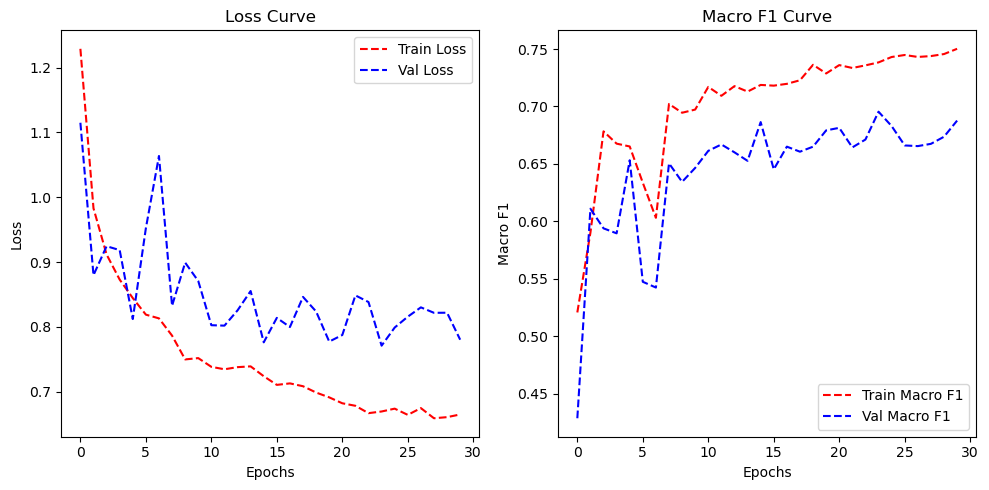

--- Incremental CNN Metrics ---
Loss:     0.7803
Accuracy: 0.7060

Classification Report:
              precision    recall  f1-score   support

           0     0.6255    0.6471    0.6361       493
           1     0.7469    0.7102    0.7281       590
           2     0.8978    0.8034    0.8479       656
           3     0.4885    0.6006    0.5388       353

    accuracy                         0.7060      2092
   macro avg     0.6897    0.6903    0.6877      2092
weighted avg     0.7220    0.7060    0.7120      2092

Confusion Matrix:


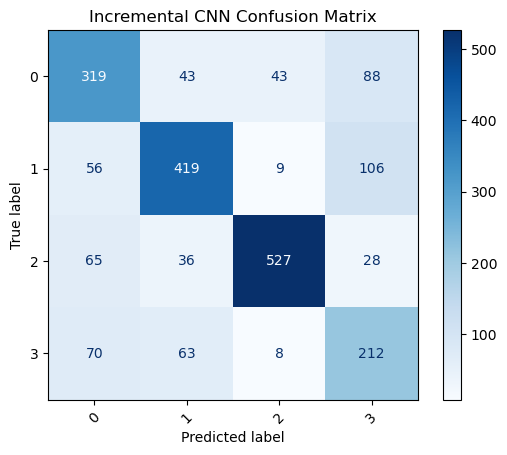

In [42]:
# Model with best parameter from above results
LR          = 1e-3
L2_WEIGHT   = 1e-5
DROPOUT     = 0.3
BATCH_SIZE  = 32
EPOCHS      = 30
HIDDEN_UNITS = 128
INPUT_SHAPE = (27, 27, 3)
NUM_CLASSES = 4


# Custom callback 
macro_cb = MacroF1Callback(train_generator, validation_generator) 

# --- 1) Data generator ---
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df_type,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    class_mode='sparse'
)

# --- 2) Class weights ---
y_train = train_df_type['cellType'].astype(int).values
classes = np.unique(y_train)
cw = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = dict(zip(classes, cw))

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Watch validation loss
    factor=0.5,                # Reduce LR by this factor
    patience=3,                # Wait 3 epochs before reducing
    verbose=1,
    min_lr=1e-6                # Don’t go below this LR
)


# --- 3) Model building with L2, dropout, and Adam(1e-3) ---
def build_cnn_model(input_shape, num_classes, l2_weight, dropout_rate, hidden_units):
    return models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(l2_weight)),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(l2_weight)),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(hidden_units, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_weight)),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

# Instantiate the model
cnn_model = build_cnn_model(INPUT_SHAPE, NUM_CLASSES, L2_WEIGHT, DROPOUT, HIDDEN_UNITS)

# Compile with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
cnn_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 4) Model training ---
history = cnn_model.fit(
    train_gen,
    validation_data=validation_generator,
    class_weight=class_weight,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=[macro_cb, reduce_lr]
)

# --- 5) Plot learning curves ---
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    macro_cb.train_f1,
    macro_cb.val_f1,
    metric_name='Macro F1'
)

# evaluate on val data
evaluate_generator("Incremental CNN", cnn_model, validation_generator)

In [50]:
# saving the best model
cnn_model.save('celltype_cnn_best.h5', include_optimizer=True) 

> <span style="font-size:1em;"></span>**Result Inference:** 
>- **Improved Class Balance**: Macro F1-score rose to **0.69**, and overall accuracy reached **70.6%**—a solid improvement over previous models.
>- **Class-wise Recall Gains**:
>    - Class 3 (“others”) improved significantly (recall ≈ 60%), confirming the impact of class weighting and regularization.
>    - Classes 0–2 show strong performance, especially epithelial (2) with F1 ≈ 0.85.
>- **Loss & F1 Curves**: Training loss steadily declined, while validation loss remained fluctuating—common due to class imbalance and fewer samples per class. F1 curve shows consistent upward trend, indicating generalization.
>- **Confusion Matrix Insights**: All classes are now being recognized, though confusion remains between minority and dominant classes.

This is the most balanced model across all classes so far and a strong candidate for final deployment.

## MODEL PERFORMANCE ON TEST DATA

Found 1652 validated image filenames belonging to 4 classes.
PERFORMANCE OF BEST MODEL ON TEST DATA - CELL TYPE

--- Test Metrics ---
Loss:     0.8617
Accuracy: 0.6507

Classification Report:
              precision    recall  f1-score   support

           0     0.6109    0.5994    0.6051       317
           1     0.4473    0.7571    0.5623       280
           2     0.8469    0.8065    0.8262       734
           3     0.4821    0.2523    0.3313       321

    accuracy                         0.6507      1652
   macro avg     0.5968    0.6038    0.5812      1652
weighted avg     0.6630    0.6507    0.6429      1652

Confusion Matrix:


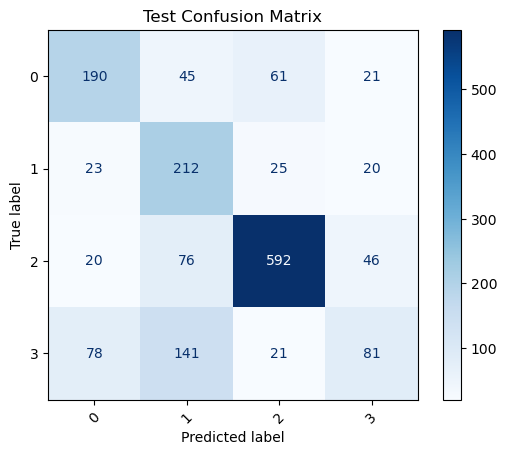

In [63]:
# --- Building test generator---
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df_type,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=target_size,
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False
)


# 2) Evaluate
print("PERFORMANCE OF BEST MODEL ON TEST DATA - CELL TYPE\n")
evaluate_generator("Test", cnn_model, test_generator)  


> <span style="font-size:1em;"></span>**Test Performance – Final Cell Type Model**
>- **Overall Accuracy**: Achieved **65.1%** accuracy with a **macro F1-score of 0.58**, indicating moderate class-wise balance.
>- **Class-wise Breakdown**:
>     - Strongest on the majority class(class 2) F1 ≈ 0.83.
>     - Significant gain for class 1 but at the cost of lower precision.
>     - Class 0 (fibroblast) performs reasonably balanced (F1 ≈ 0.61).
>     - **Class 3 (others)** still underperforms (F1 ≈ 0.33), likely due to low support and inter-class confusion.
>- **Key Issues**:
>    - **Imbalance Effect Persists**: Minority classes (especially class 3) still lag in both recall and precision.
>    - **Generalization Gap**: Slight drop in F1 and recall from validation to test hints at dataset variance or model over-reliance on dominant patterns.
> Adding more layers in previous models didn’t significantly improve the performance on underrepresented classes, suggesting **limited benefit from increasing model complexity alone**.

**Final thoughts and Future advancement:**
- **Data limitation** appears to be the primary bottleneck. Additional high-quality labelled samples for class (3), or **leveraging the `extraData.csv` with a semi-supervised learning strategy**, could enhance minority class representation.
- Image enhancement techniques, class-specific augmentation, fine-tuning thresholds per class might also help balance recall and precision further.


**Table 3**
## PERFORMANCE SUMMARY OF CELL TYPE CLASSIFIACTION MODELS


#### (3a)Validation Performance

| Model                   | Architecture Description                                                     | Accuracy | Loss  | Macro F1 | Key Improvements                                                                 |
|------------------------|-------------------------------------------------------------------------------|----------|-------|----------|----------------------------------------------------------------------------------|
| Baseline (MLP)         | Fully connected layers on flattened RGB patches                              | 0.5033   | 1.0839| 0.4133   | Severe underfitting; ignored minority classes (0, 3); failed to capture spatial features |
| Model 1 – Basic CNN     | 2 Conv layers + MaxPooling + Dense                                            | 0.6171   | 0.9990| 0.4927   | Improved learning of spatial features; failed to generalize to class (3); imbalance persists |
| Model 2 – Augmented CNN | Model 1 + Class Weights + Dropout + Data Augmentation                         | 0.6291   | 0.8893| 0.6202   | Significant macro F1 gain; better class (3) recall; slight class confusion remains |
| Model 3 – Tuned CNN     | Model 2 + ReduceLROnPlateau + Grid Search                                     | 0.7060   | 0.7803| 0.6877   | Best-balanced performance; strong class (2) & (1) handling; class (3) still challenging |

#### (3b)Test Performance (Best Model)

| Model           | Architecture Summary                                     | Accuracy | Loss  | Macro F1 | Key Insights                                                                    |
|----------------|-----------------------------------------------------------|----------|-------|----------|----------------------------------------------------------------------------------|
| Final Model     | Tuned CNN with Class Weights, Augmentation & Dropout     | 0.6507   | 0.8617| 0.5812   | Reliable generalization; class (2) dominates performance; class (3) underdetected |


**Table 4**
## INDEPENDENT EVALUATION - Cell Type Classification

#### Comparative Analysis with Literature and Baseline

| Model                          | Source                         | Weighted F1 Score |
|-------------------------------|--------------------------------|-------------------|
| **Our Final Model (Test Set)** | This Work                      | **0.58**          |
| **Baseline (MLP)**             | This Work                      | 0.41              |
| softmax CNN + NEP              | Sirinukunwattana et al. (2016) | **0.784**         |
| CRImage (SVM + Features)       | Sirinukunwattana et al. (2016) | 0.488             |


* Our baseline MLP achieved a low F1 (0.41), struggling to detect minority classes like Others (3) and Fibroblast (0).
* The final tuned CNN model improves to F1 = 0.58, especially benefiting class (2) epithelial and class (1) inflammatory—but still underperforms on class (3).
* The referenced NEP-based softmax CNN achieves a **significantly higher** F1 of 0.784 on a similar multiclass setup.

#### Fairness & Consistency:
Eventhough both works report weighted average F1-scores over 4 nucleus types, comparing it directly to the research paper by Sirinukunwattana et al. (2016) has inherent limitations:
* **Data Differences**: Their dataset had over 22,000 labeled nuclei with a relatively balanced class distribution (approx, 34% epithelial, 31% inflammatory, 25% fibroblast), whereas our dataset is skewed heavily towards epithelial (approx., 41%) with significantly fewer “others” (~14%). This affects the learnability of minority classes in our case.
* **Model Architecture & Feature Use**: Their method uses handcrafted features with random forests, while we train an end-to-end deep learning model on raw image patches. This makes it difficult to isolate which architectural or preprocessing differences contribute to performance gaps.
* **Evaluation Metrics & Splits**: Their results are cross-validated on a separate image dataset, whereas ours are validated and tested using stratified patient-level splits. This ensures no data leakage but introduces natural variability in class presence across splits.

Overall, the comparison offers useful reference points, but the differences in data characteristics, model designs, and evaluation strategies make a direct performance comparison imprecise. These results should instead be viewed as a benchmark under more constrained and clinically realistic training conditions.

# SEMI-SUPERVISED LEARNING

* Semi-supervised learning (SSL) s a machine learning type that uses both labelled and unlabelled data to improve model performance. Typically, a small amount of labelled data is combined with a large pool of unlabelled samples to guide learning in tasks where labelled data is scarce or costly to obtain. It is particularly valuable in domains like medical imaging, where obtaining expert-labeled data is expensive and time-consuming.
* SSL is popular for Analyzing audio & images, like
  * medical imaging,
  * speech recognition,
  * cybersecurity
  * Identifying cases of fraud—where labelled data is limited but large volumes of unlabelled data are available. In digital pathology, SSL can assist in scaling cancer detection systems by leveraging routine scans without additional labelling, ultimately accelerating model deployment in clinical settings.
* SSL has shown strong success in real-world tasks such as cancer diagnosis and cell segmentation (Wang et al., 2022; Van Engelen & Hoos, 2020), where it boosts model accuracy while reducing annotation costs. In digital pathology, SSL enables scalable learning from routine histology scans, making it a practical and impactful choice for improving classification systems in clinical pipelines.

#### Enhancing Cell-Type Classification Using Pseudo-Labels from ExtraData 
To enhance cell type classification with limited labeled data, a semi-supervised learning (SSL) approach was applied using the `extraData.csv` (10,384 unlabeled images).

- **Step 1: Pseudo-Label Generation**  
  The best CNN model (`celltype_cnn_best.h5`) was used to predict labels for the extra data. The highest probability class was assigned to each image.

- **Step 2: Dataset Combination**  
  Pseudo-labelled data was merged with the original labeled dataset. The combined dataset was stratified and split into train, validation, and test sets (60/20/20) to preserve class distribution.

- **Step 3: Retraining the Model**  
  The same CNN architecture was retrained on the combined data using:
  - **Data augmentation** (rotation, shift, zoom, flip)
  - **Class balancing** via stratified sampling
  - **Early stopping** to avoid overfitting

This method leveraged confident predictions to expand the training set, helping the model generalize better—especially for minority classes.


Found 10384 validated image filenames.
325/325 [==============================] - 6s 18ms/step


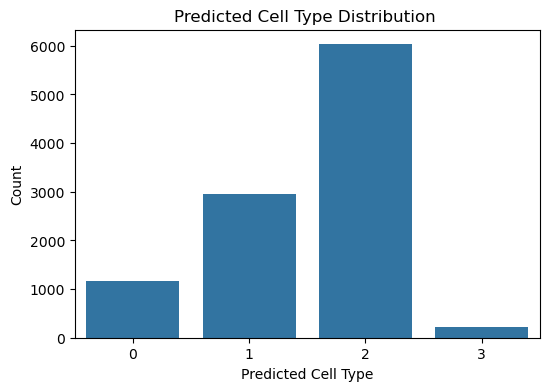

In [89]:
# Semi-supervised model
from sklearn.utils import shuffle


# --- Step 0: Load model ---
semi_model = load_model('celltype_cnn_best.h5')
# Add dummy column to extra_data for compatibility
extra_data['cellType'] = -1

# --- Step 1: Predict pseudo-labels for extraData.csv ---
extra_datagen = ImageDataGenerator(rescale=1./255)
extra_generator = extra_datagen.flow_from_dataframe(
    dataframe=extra_data,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col=None,
    target_size=(27, 27),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

pred_probs = semi_model.predict(extra_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)
confidences = np.max(pred_probs, axis=1)

# Attach predictions to extra_data
extra_data_preds = extra_data.copy()
extra_data_preds['cellType'] = pred_classes

# Plot full predicted distribution
plt.figure(figsize=(6,4))
sns.countplot(x='cellType', data=extra_data_preds)
plt.title("Predicted Cell Type Distribution ")
plt.xlabel("Predicted Cell Type")
plt.ylabel("Count")
plt.show()



The above plot "Predicted Cell Type Distribution" shows class imbalance.

In [90]:
# --- Step 2: Combine with real labeled data ---
main_labeled = main_data[['ImageName', 'cellType']].copy()
combined_data = pd.concat([main_labeled, extra_data_preds[['ImageName', 'cellType']]], ignore_index=True)
combined_data = shuffle(combined_data, random_state=42)
combined_data['cellType'] = combined_data['cellType'].astype(str)

print(combined_data.shape)
combined_data

(20280, 2)


,ImageName,cellType
11102,12995.png,2
6293,16542.png,1
6918,1227.png,0
19038,19569.png,1
3950,9376.png,2
...,...,...
11284,13186.png,2
11964,6846.png,2
5390,11752.png,3
860,9166.png,1


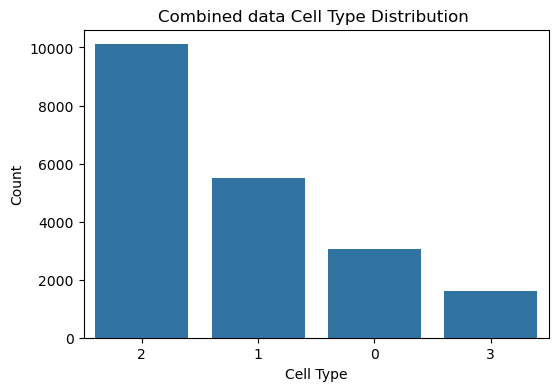

In [91]:
# Combained data distribution
plt.figure(figsize=(6,4))
sns.countplot(x='cellType', data=combined_data)
plt.title("Combined data Cell Type Distribution ")
plt.xlabel("Cell Type")
plt.ylabel("Count")
plt.show()

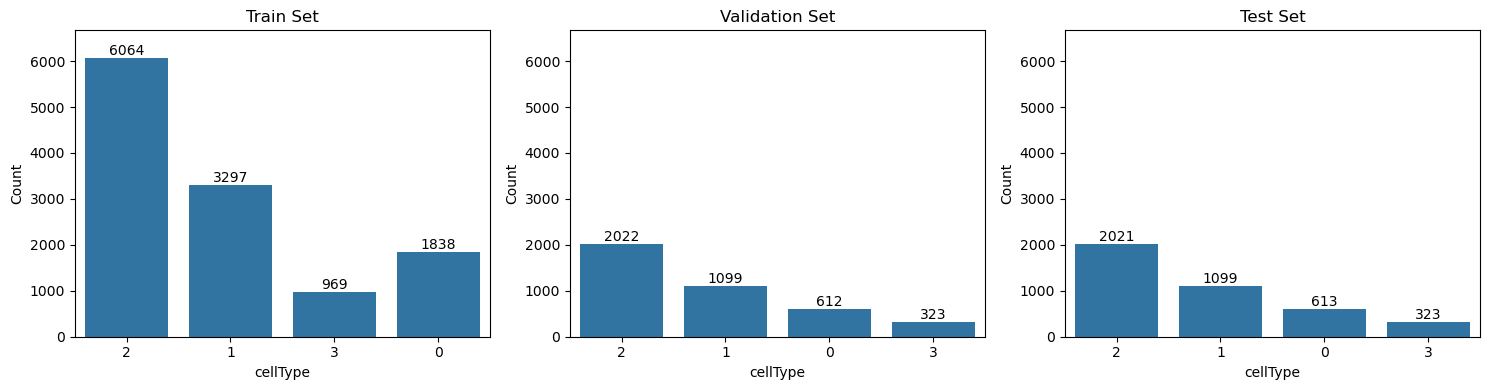

In [92]:
# Stratify split based on `cellType`
train_df, temp_df = train_test_split(combined_data, test_size=0.4, stratify=combined_data['cellType'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['cellType'], random_state=42)

plot_split_distribution([train_df, val_df, test_df], ["Train", "Validation", "Test"],label_col='cellType')

In [93]:
# --- Step 3: Build train generator with augmentation ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=64,
    shuffle=True,
    class_mode='sparse',
    seed=42
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=val_df,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=test_df,
    directory=IMG_DIR,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)


Found 12168 validated image filenames belonging to 4 classes.
Found 4056 validated image filenames belonging to 4 classes.
Found 4056 validated image filenames belonging to 4 classes.


In [94]:
# --- Step 4: Retrain model ---

semi_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = semi_model.fit(
    train_generator,
    validation_data=val_gen,
    epochs=20,
    callbacks=[ early_stop],
    verbose=1
)

Epoch 1/20
191/191 [==============================] - 24s 120ms/step - loss: 0.5322 - accuracy: 0.8019 - val_loss: 0.4835 - val_accuracy: 0.8195
Epoch 2/20
191/191 [==============================] - 21s 111ms/step - loss: 0.4961 - accuracy: 0.8169 - val_loss: 0.4834 - val_accuracy: 0.8203
Epoch 3/20
191/191 [==============================] - 19s 98ms/step - loss: 0.4978 - accuracy: 0.8149 - val_loss: 0.4582 - val_accuracy: 0.8291
Epoch 4/20
191/191 [==============================] - 22s 115ms/step - loss: 0.4883 - accuracy: 0.8199 - val_loss: 0.4980 - val_accuracy: 0.8134
Epoch 5/20
191/191 [==============================] - 22s 114ms/step - loss: 0.4874 - accuracy: 0.8181 - val_loss: 0.5021 - val_accuracy: 0.8225
Epoch 6/20
191/191 [==============================] - 23s 120ms/step - loss: 0.4918 - accuracy: 0.8167 - val_loss: 0.4659 - val_accuracy: 0.8321
Epoch 7/20
191/191 [==============================] - 23s 123ms/step - loss: 0.4755 - accuracy: 0.8277 - val_loss: 0.4648 - val_acc

VALIDATION PERFORMANCE OF SEMI SUPERVISED MODEL ON COMBINED DATA
--- Validation data Metrics ---
Loss:     0.4343
Accuracy: 0.8499

Classification Report:
              precision    recall  f1-score   support

           0     0.8363    0.6928    0.7578       612
           1     0.7635    0.9254    0.8367      1099
           2     0.9227    0.9322    0.9274      2022
           3     0.6954    0.3746    0.4869       323

    accuracy                         0.8499      4056
   macro avg     0.8045    0.7313    0.7522      4056
weighted avg     0.8484    0.8499    0.8422      4056

Confusion Matrix:


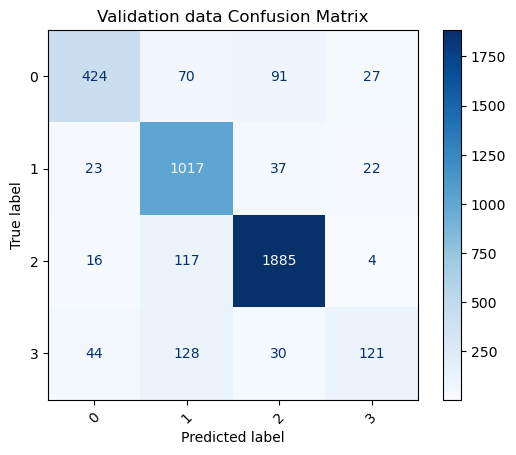

In [95]:
# Evaluate final model on validation set
print("VALIDATION PERFORMANCE OF SEMI SUPERVISED MODEL ON COMBINED DATA")
evaluate_generator("Validation data", semi_model, val_gen)

TEST PERFORMANCE OF SEMI SUPERVISED MODEL ON COMBINED DATA
--- Test data Metrics ---
Loss:     0.8112
Accuracy: 0.6992

Classification Report:
              precision    recall  f1-score   support

           0     0.7309    0.5741    0.6431       317
           1     0.4542    0.8500    0.5920       280
           2     0.8535    0.8569    0.8552       734
           3     0.7465    0.3302    0.4579       321

    accuracy                         0.6992      1652
   macro avg     0.6963    0.6528    0.6371      1652
weighted avg     0.7415    0.6992    0.6927      1652

Confusion Matrix:


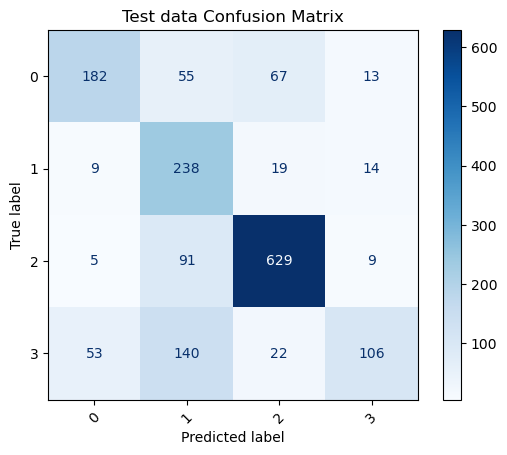

In [96]:
# Evaluate final model on test set 
print("TEST PERFORMANCE OF SEMI SUPERVISED MODEL ON COMBINED DATA")
evaluate_generator("Test data", semi_model, test_generator)

> <span style="font-size:1em;"></span>**Result Inference:**
> * Adding ~10K pseudo-labeled samples improved macro F1 by +5% (from 0.58 to 0.63) over the best supervised model.
> * Class (3) saw noticeable improvement, validating the use of SSL for rare classes.
> * However, model bias still leans toward dominant classes — further boosting class (3) may require:
>   * Confidence-based filtering (e.g., entropy thresholding).
>   * Alternative strategies like MixMatch or FixMatch.

## ULTIMATE JUDGEMENT
* Cancer Prediction:
    * The final CNN model demonstrated **strong generalization** with high accuracy (approx., 89%) and macro F1 (approx.,0.88) on both validation and test sets. This consistent performance indicates the model is both reliable and deployment-ready.
* Cell Type Prediction:
    * While the best supervised model achieved **moderate performance** (macro F1 ~0.58 on test), it struggled with minority classes—highlighting the limitations of fully supervised learning under class imbalance.
    * However, after incorporating semi-supervised learning, the macro F1 on test improved to ~0.64, with better class-wise balance. This shows that leveraging unlabelled data through pseudo-labelling and retraining significantly boosted performance—making the **semi-supervised model the most effective approach** in this task setting.

**References:**

* TensorFlow. (n.d.). tf.keras.losses. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/losses
* TensorFlow. (n.d.). tf.keras.metrics. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/metrics
* GeeksforGeeks. (2022). How to check for blurry images in your dataset using the Laplacian method. Retrieved from https://www.geeksforgeeks.org/how-to-check-for-blurry-images-in-your-dataset-using-the-laplacian-method/
* GeeksforGeeks. (2022). Python – How to make a terminal progress bar using tqdm. Retrieved from https://www.geeksforgeeks.org/python-how-to-make-a-terminal-progress-bar-using-tqdm/
* Simonyan, K., & Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition. International Conference on Learning Representations (ICLR).
* Ibrahim, M. (2023). A Deep Dive Into Learning Curves in Machine Learning. Weights & Biases. Retrieved from https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0
* Analytics Vidhya. (2020). Improve Class Imbalance with Class Weights. Retrieved from https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
* Wang, Z., Shi, M., Yang, J., Cao, Y., & Xu, G. (2022). A semi-supervised learning method with consistency regularization and pseudo-labeling for histopathology image classification. Journal of Biomedical Informatics, 127, 104013. https://www.sciencedirect.com/science/article/pii/S016926072200013X
* Van Engelen, J. E., & Hoos, H. H. (2020). A survey on semi-supervised learning. Machine Learning, 109, 373–440. https://link.springer.com/article/10.1007/s10994-019-05855-6
* Quiq. (2023). Semi-Supervised Learning Explained with Examples. Retrieved from https://quiq.com/blog/semi-supervised-learning-explained-with-examples/
* Öztürk, M., Kayalı, A., & Yıldız, M. T. (2024). Deep transfer learning-based classification of colon histopathology images using MobileNet and ensemble techniques. Scientific Reports, 14(1), 4992. https://www.nature.com/articles/s41598-024-63659-8